In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np 
import os
import seaborn as sns
import pandas as pd

In [2]:
import src.utils as utils

## Define Parameters

In [3]:
example_data_path = 'data_example.json'
with open(example_data_path, 'r') as example_f:
    example_data = json.load(example_f)

dataset_root_path = 'dataset'

In [4]:
skeleton_keys = ['elbow_left', 'elbow_right', 'hand_left', 'hand_right', 'head','sholder_center', 'sholder_left', 'sholder_right', 'wrist_left', 'wrist_right']
large_angle_diff_threshold = 30

In [5]:
distribution_visualize = False

## Symmetry Analysis


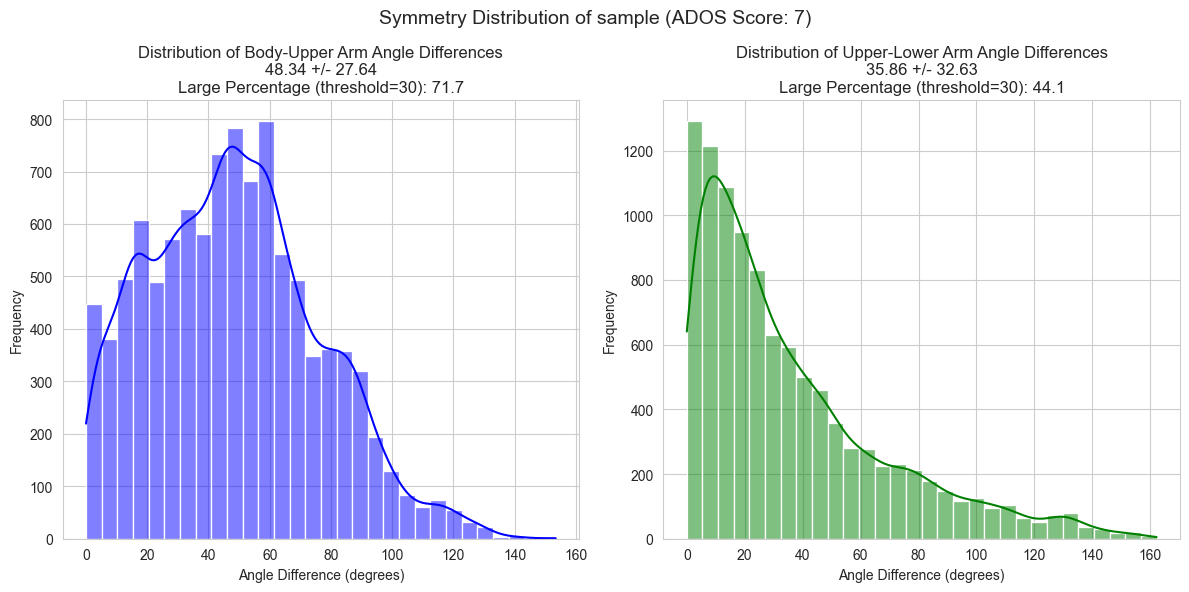

In [6]:
utils.symmetry_analysis(example_data, skeleton_keys, large_angle_diff_threshold, "sample")

In [7]:
df = utils.prepare_data_for_symmetry_analysis(dataset_root_path, skeleton_keys, large_angle_diff_threshold, distribution_visualize)
df

User 10 User 10_0_diagnosis abilities_20170508_104619.961000.json {'ability': 'TT', 'difficultyLevel': 1, 'end': 21336, 'index': 0, 'start': 0}
User 10 User 10_15_diagnosis abilities_20170512_110000.912000.json {'ability': 'IM', 'difficultyLevel': 1, 'end': 2232, 'index': 15, 'start': 0}
User 10 User 10_1_diagnosis abilities_20170508_110238.716000.json {'ability': 'TT', 'difficultyLevel': 1, 'end': 5240, 'index': 1, 'start': 0}
User 10 User 10_2_diagnosis abilities_20170508_111028.299000.json {'ability': 'JA', 'difficultyLevel': 1, 'end': 9940, 'index': 2, 'start': 0}
User 10 User 10_3_diagnosis abilities_20170508_112106.830000.json {'ability': 'JA', 'difficultyLevel': 1, 'end': 1293, 'index': 3, 'start': 0}
User 10 User 10_4_diagnosis abilities_20170508_112310.500000.json {'ability': 'TT', 'difficultyLevel': 1, 'end': 25077, 'index': 4, 'start': 0}
User 10 User 10_5_diagnosis abilities_20170510_100110.194000.json {'ability': 'IM', 'difficultyLevel': 1, 'end': 16864, 'index': 5, 'start

ados_score  diff_body_upper_arm_mean  diff_body_upper_arm_std  \
0            14                 35.612456                25.486591   
1            14                 30.483801                14.961211   
2            14                 38.755280                26.265727   
3            14                 24.726583                29.777432   
4            14                 45.476403                29.687821   
..          ...                       ...                      ...   
340          17                 31.117505                22.915064   
341          17                 31.797160                17.510278   
342          17                 36.962284                14.908601   
343          17                 44.329633                22.359433   
344          17                 38.538716                22.298524   

     diff_upper_lower_arm_mean  diff_upper_lower_arm_std  \
0                    25.309382                 29.494355   
1                    24.482643                 23.058223   
2                    29.870811                 30.544653   
3                    28.370463                 37.787130   
4                    47.155000                 42.414365   
..                         ...                       ...   
340                  29.850866                 28.352067   
341                  24.045675                 23.089388   
342                  24.477546                 21.330859   
343                  30.980152                 25.627071   
344                  23.561649                 22.424756   

     large_diff_body_upper_arm_percentage  \
0                               60.645883   
1                               39.560932   
2                               63.164794   
3                               35.751555   
4                               67.594741   
..                                    ...   
340                             42.486459   
341                             44.919599   
342                             72.618360   
343                             86.900206   
344                             65.994817   

     large_diff_upper_lower_arm_percentage task_ability  task_difficultyLevel  
0                                30.630505           TT                     1  
1                                28.942652           IM                     1  
2                                37.546816           TT                     1  
3                                35.490668           JA                     1  
4                                55.684455           JA                     1  
..                                     ...          ...                   ...  
340                              36.679683           TT                     1  
341                              28.950128           TT                     1  
342                              27.814665           TT                     1  
343                              40.889020           JA                     2  
344                              30.593147           TT                     1  

[345 rows x 9 columns]

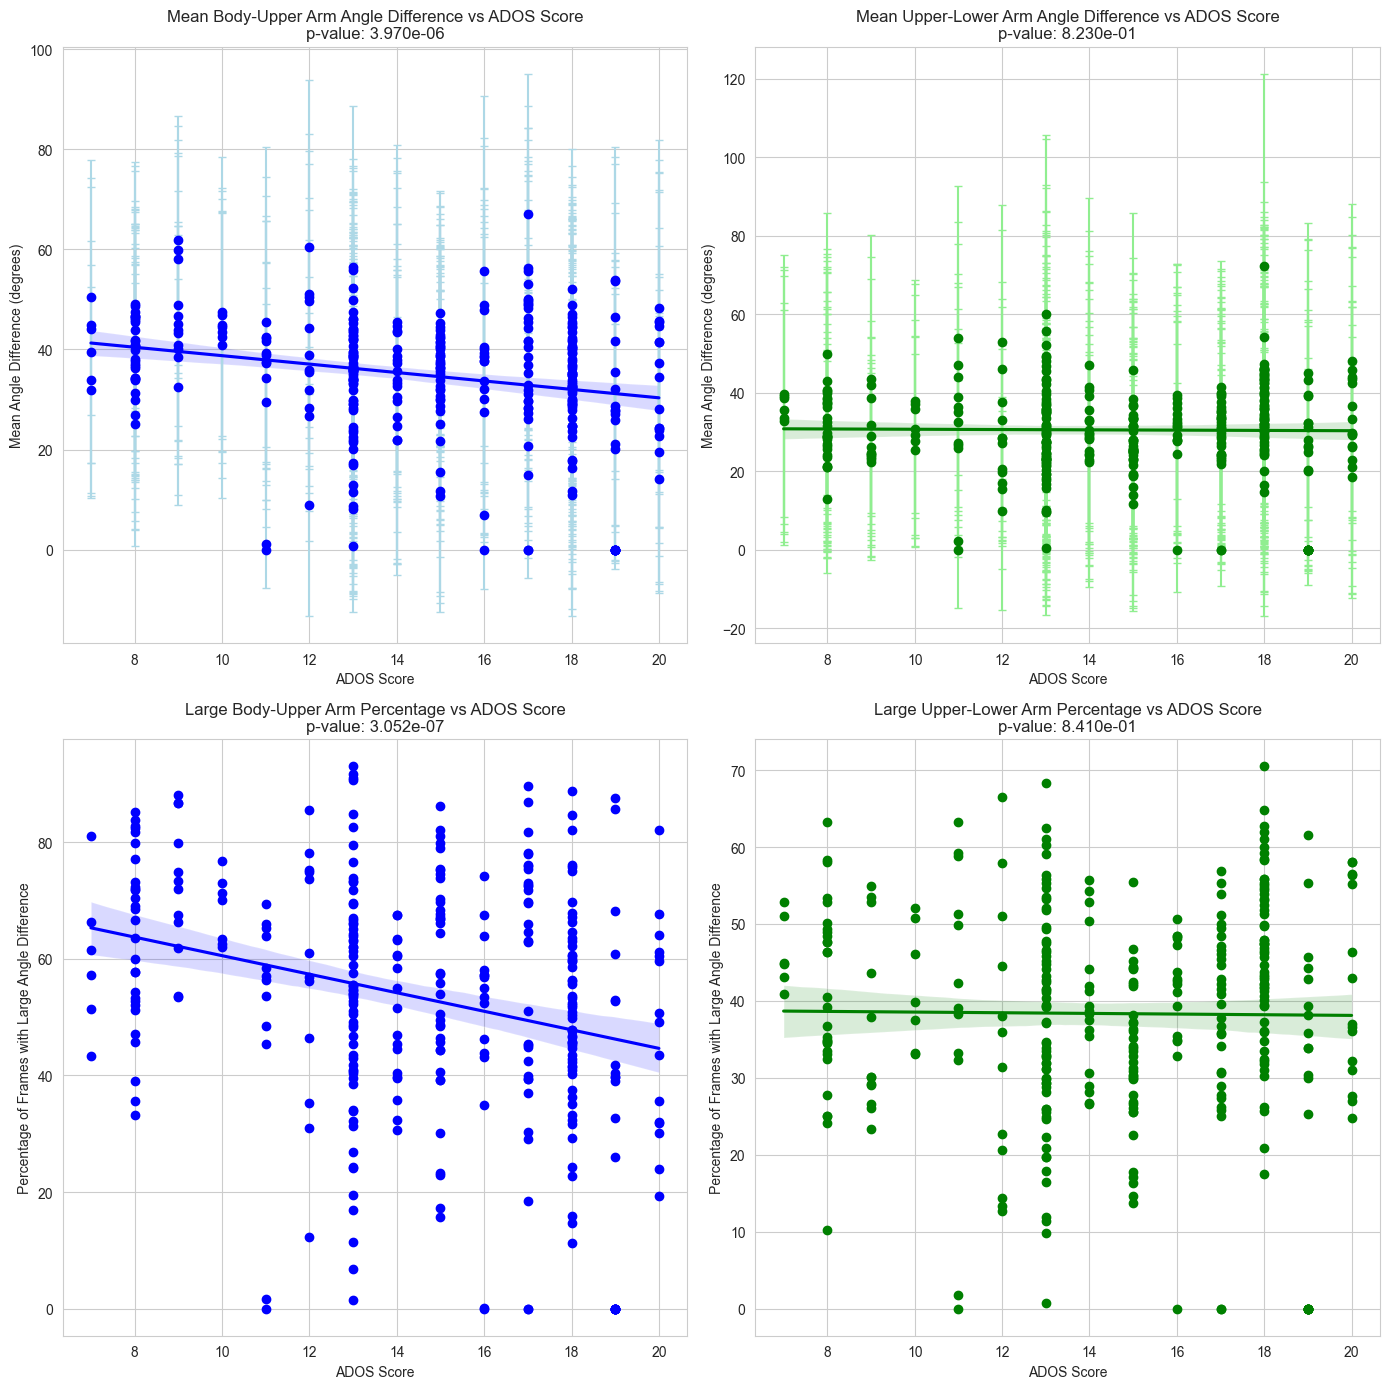

In [8]:
plt.figure(figsize=(14, 14))
utils.plot_symmetry_vs_ados(df, plt)

Sessions include initial diagnosis, 8 interventions, and a final diagnosis. However, ADOS scores are only published for the initial diagnosis. For now, work with initial diagnosis data and ADOS scores.

## Symmetry Analysis Breakdown

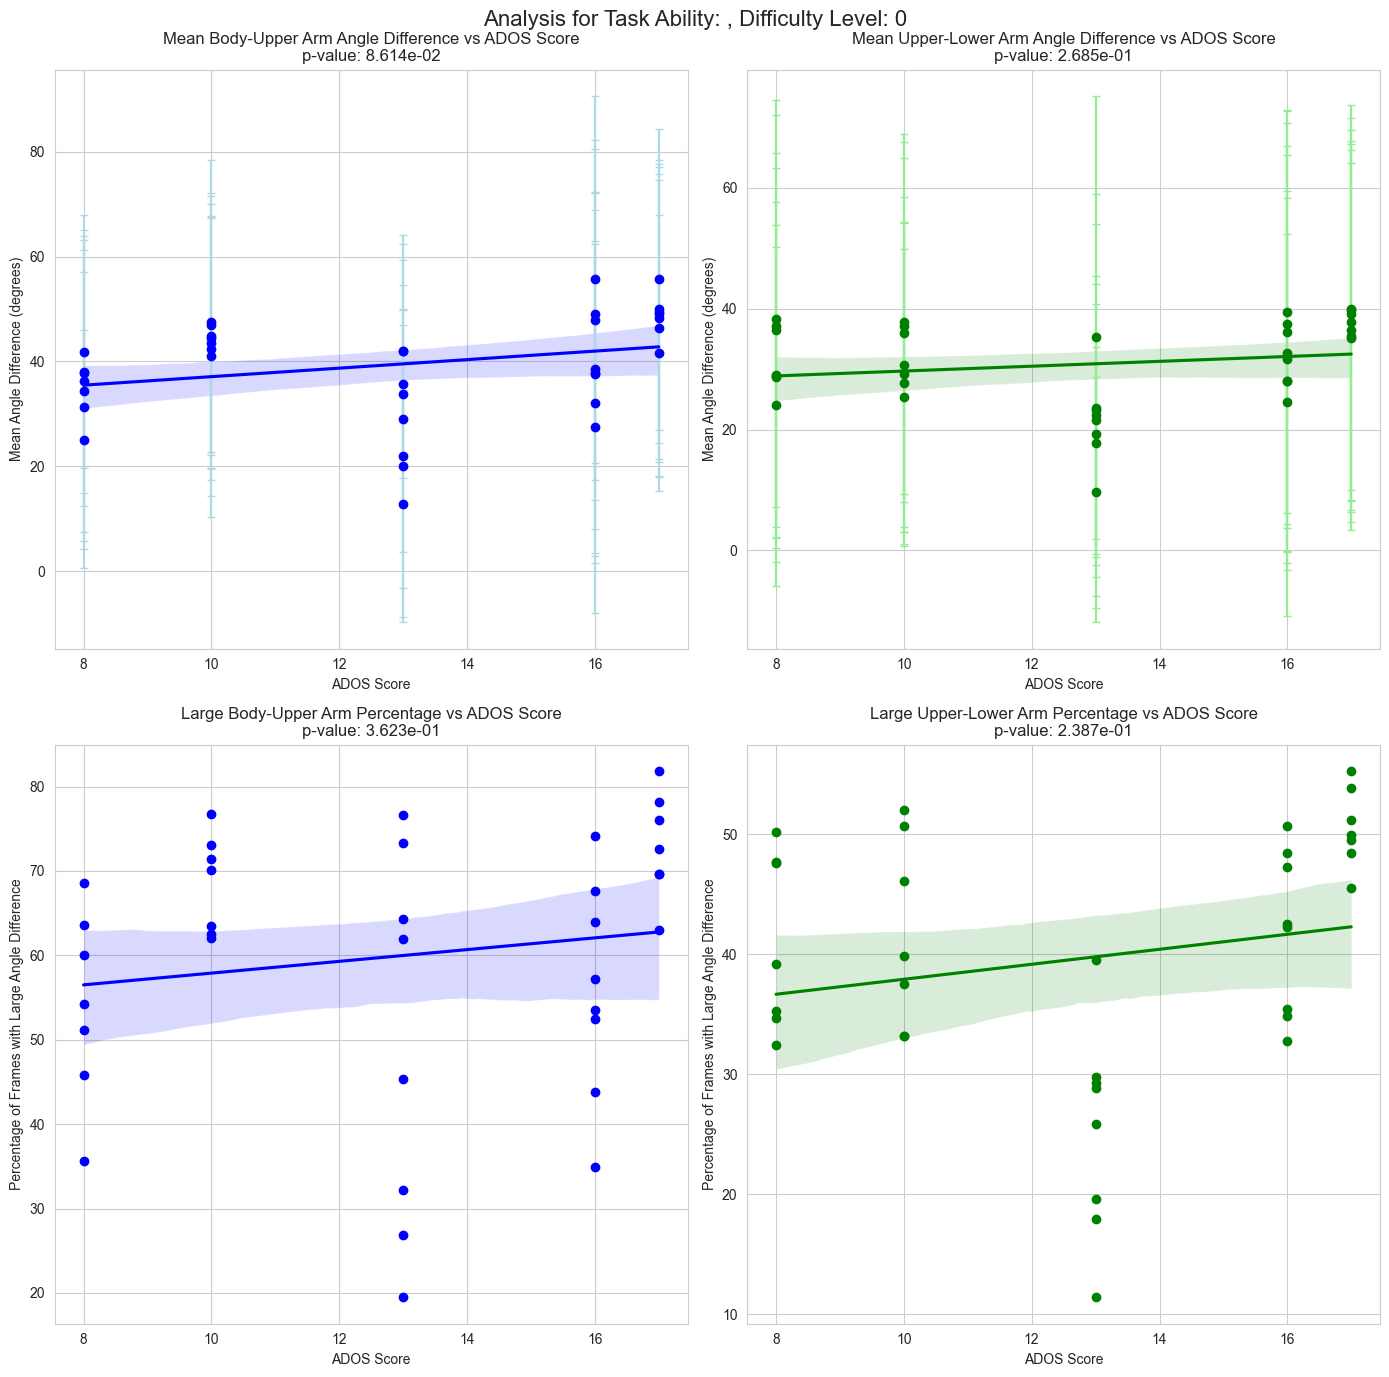

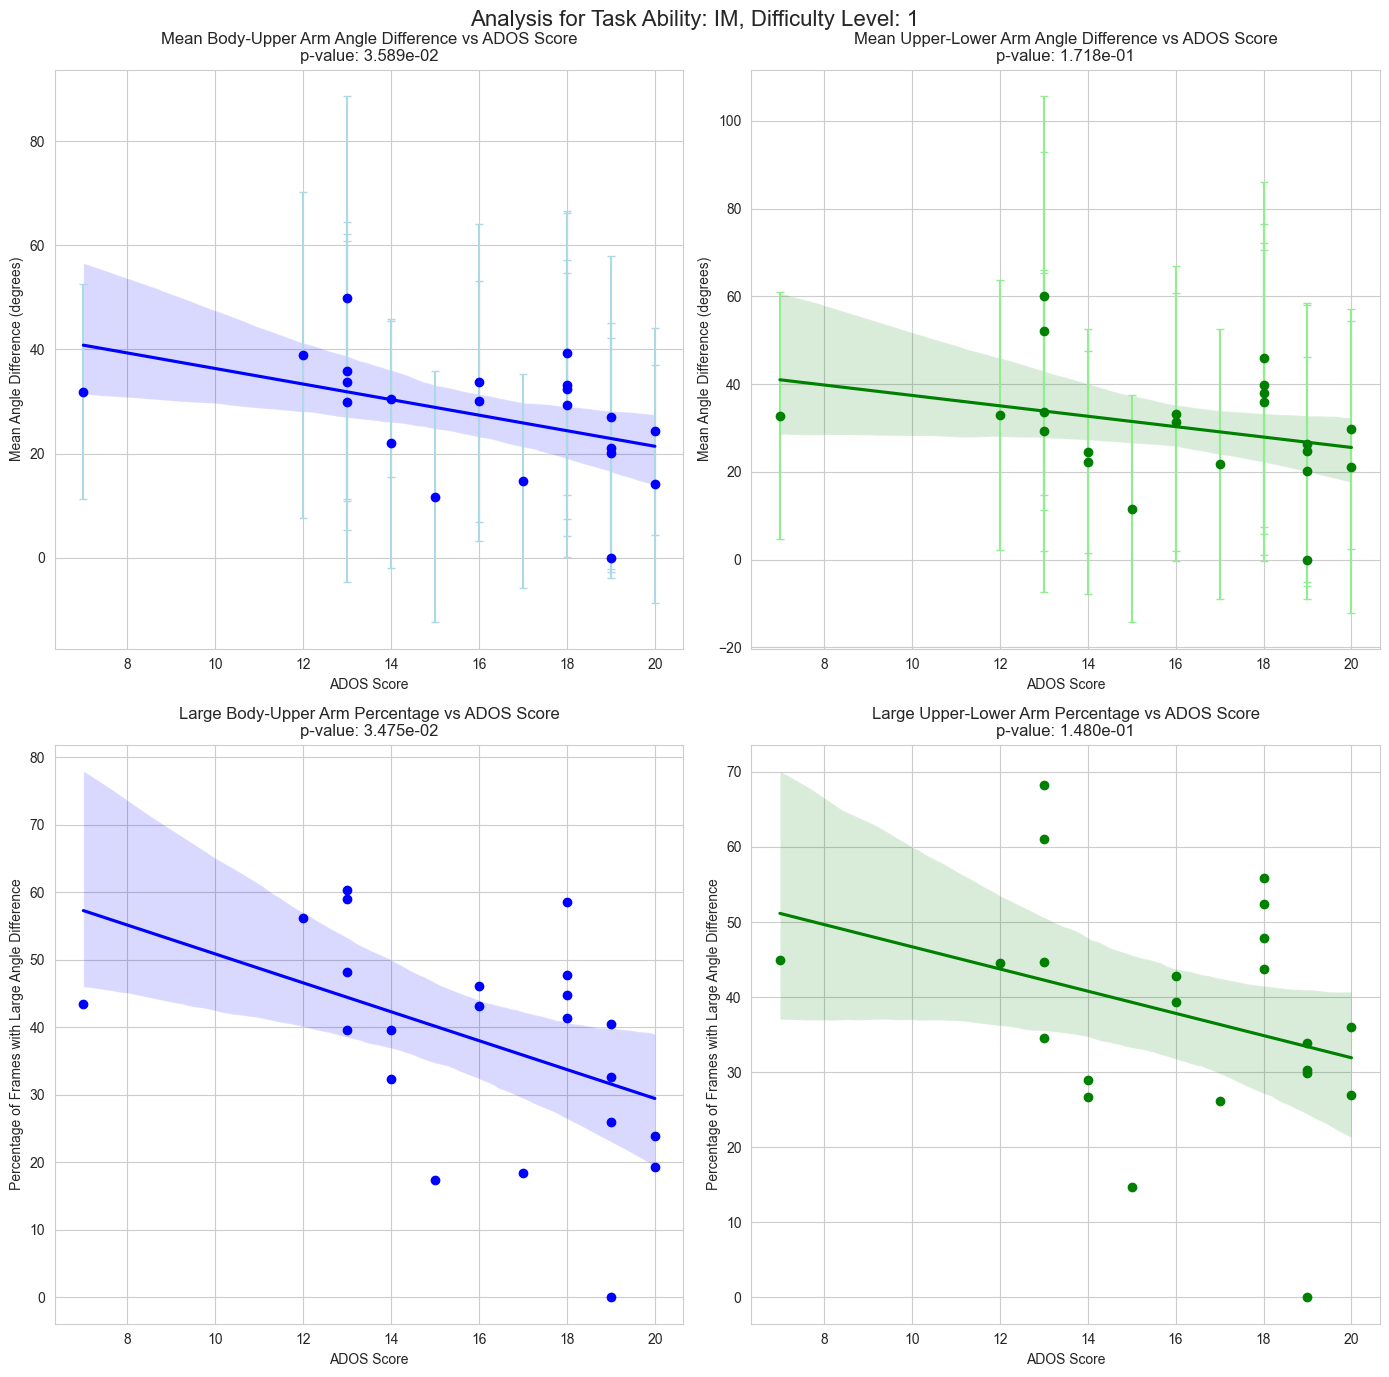

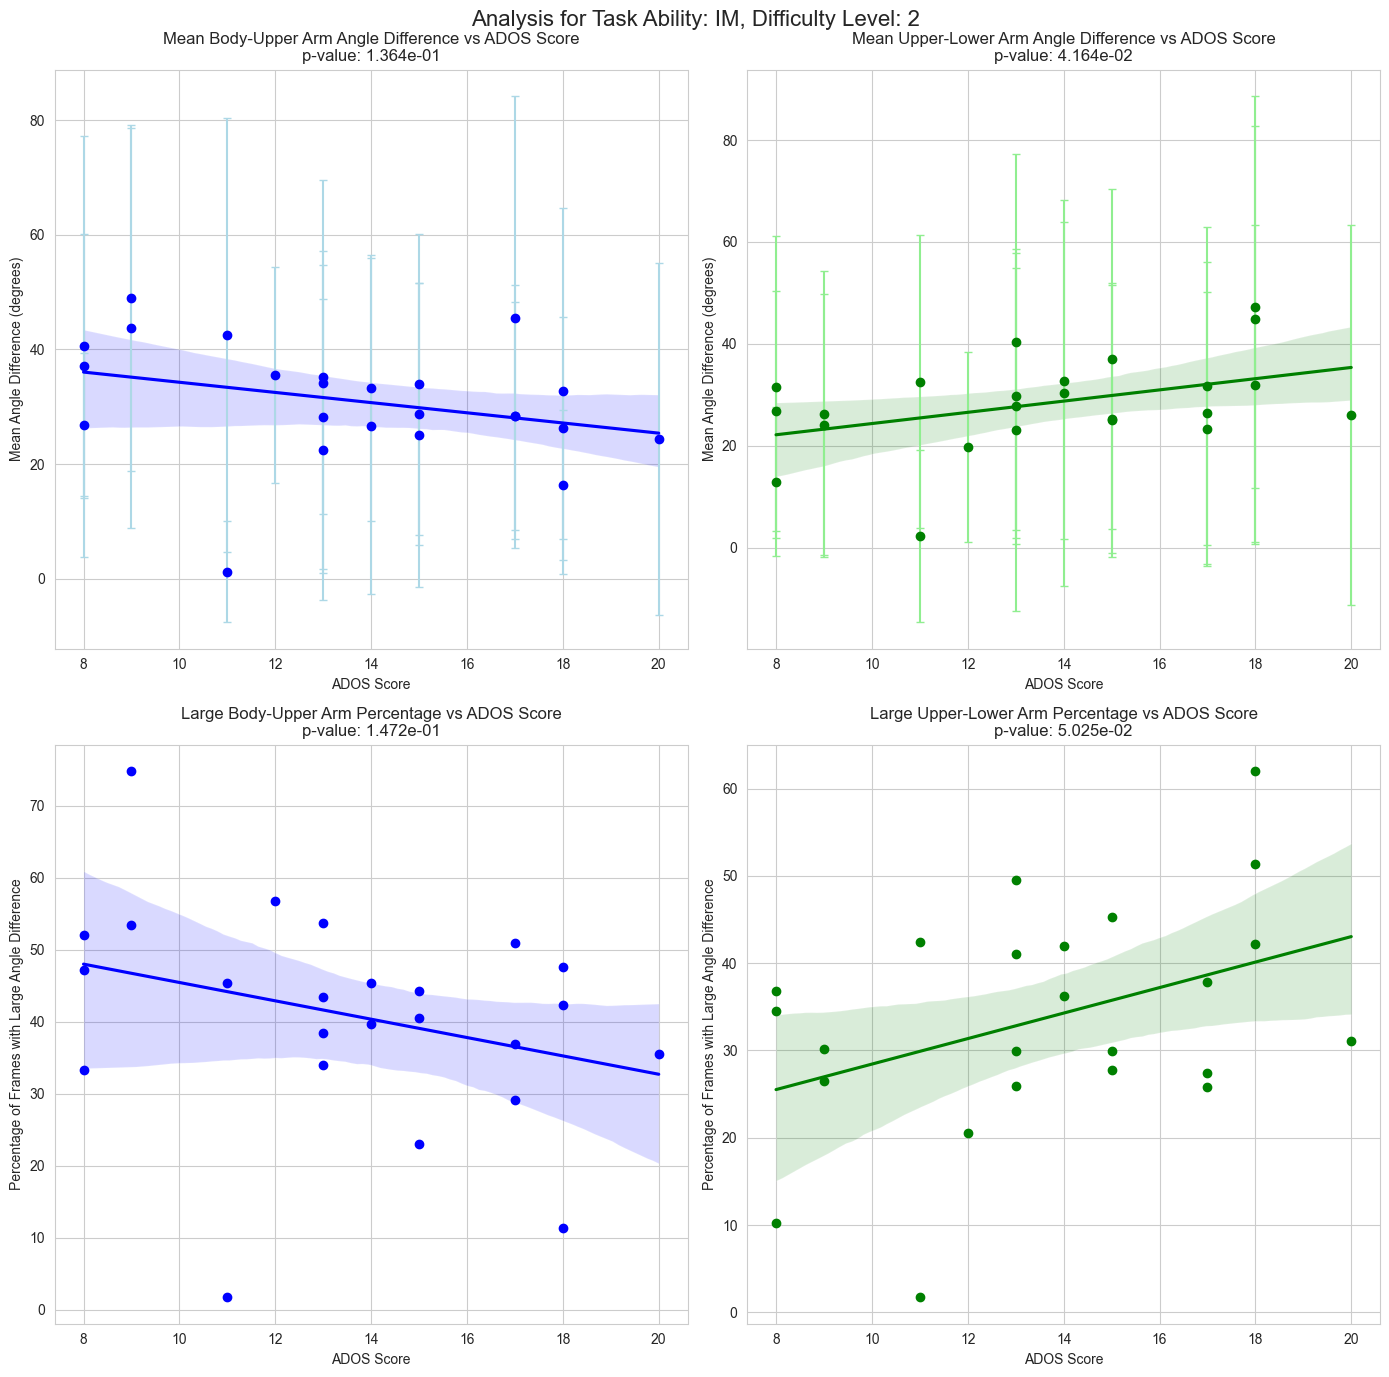

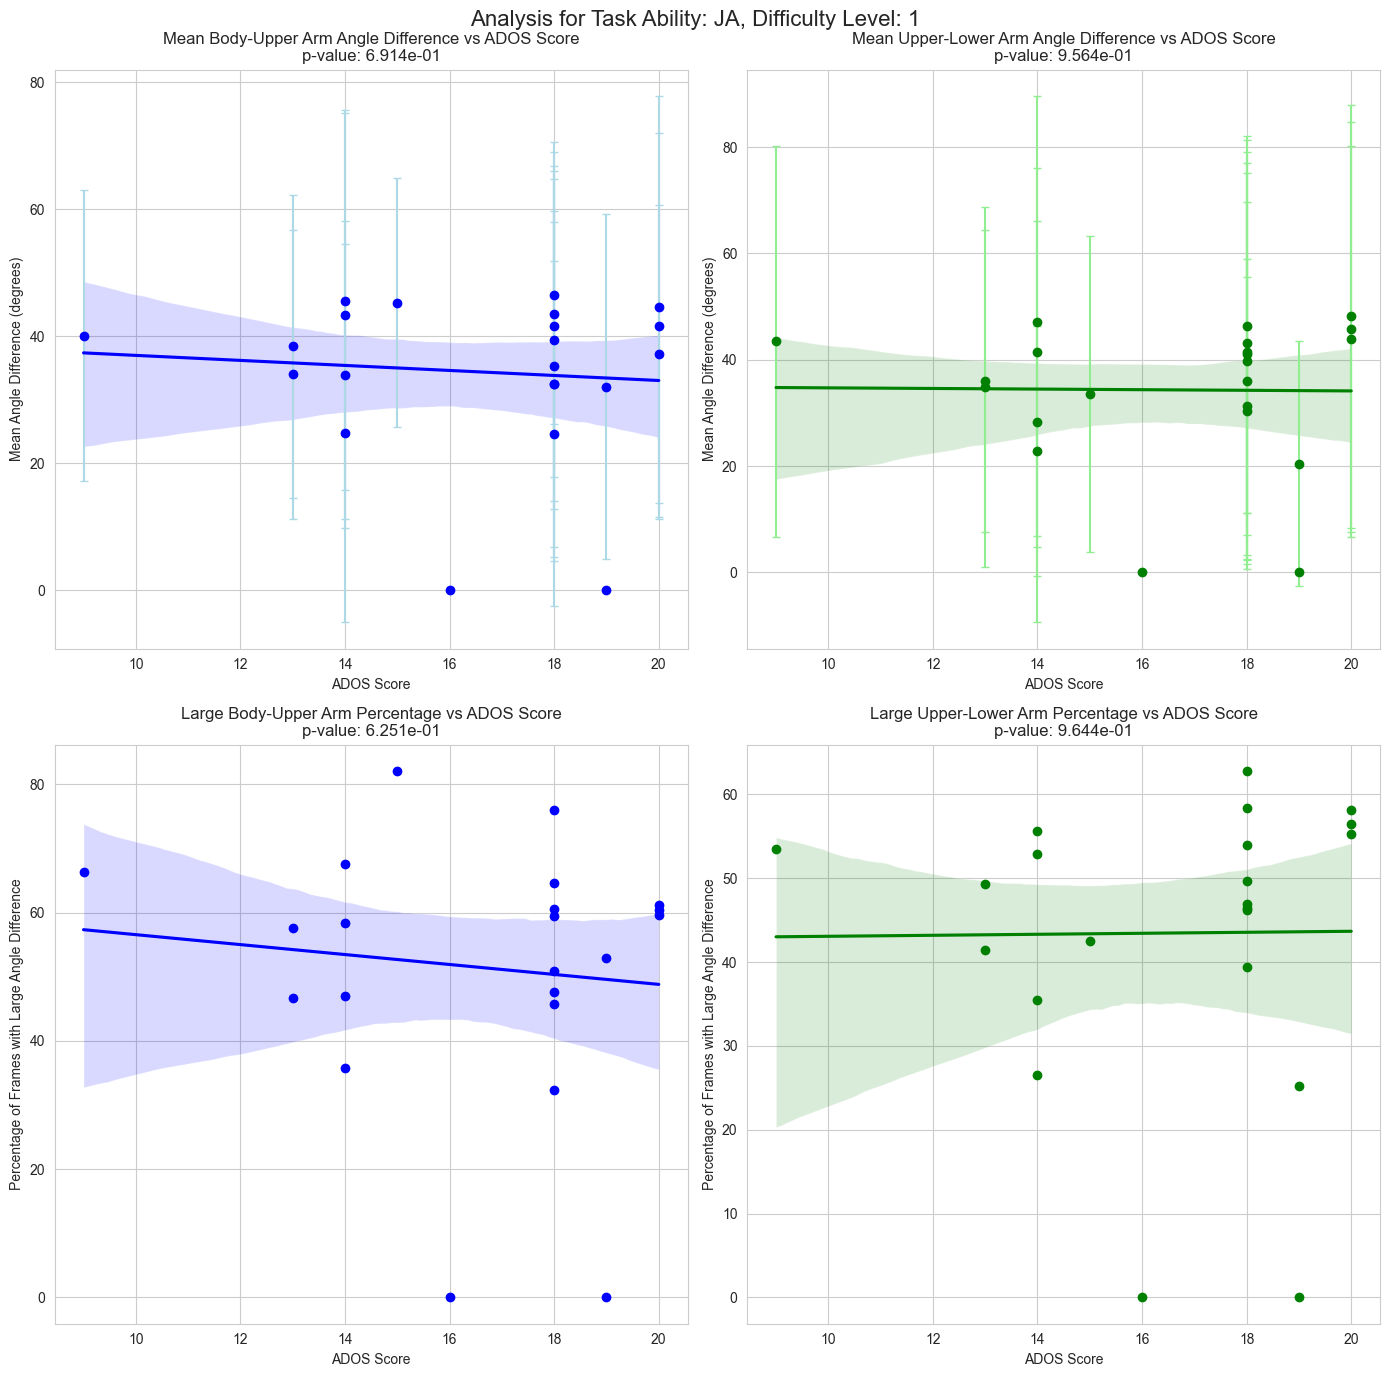

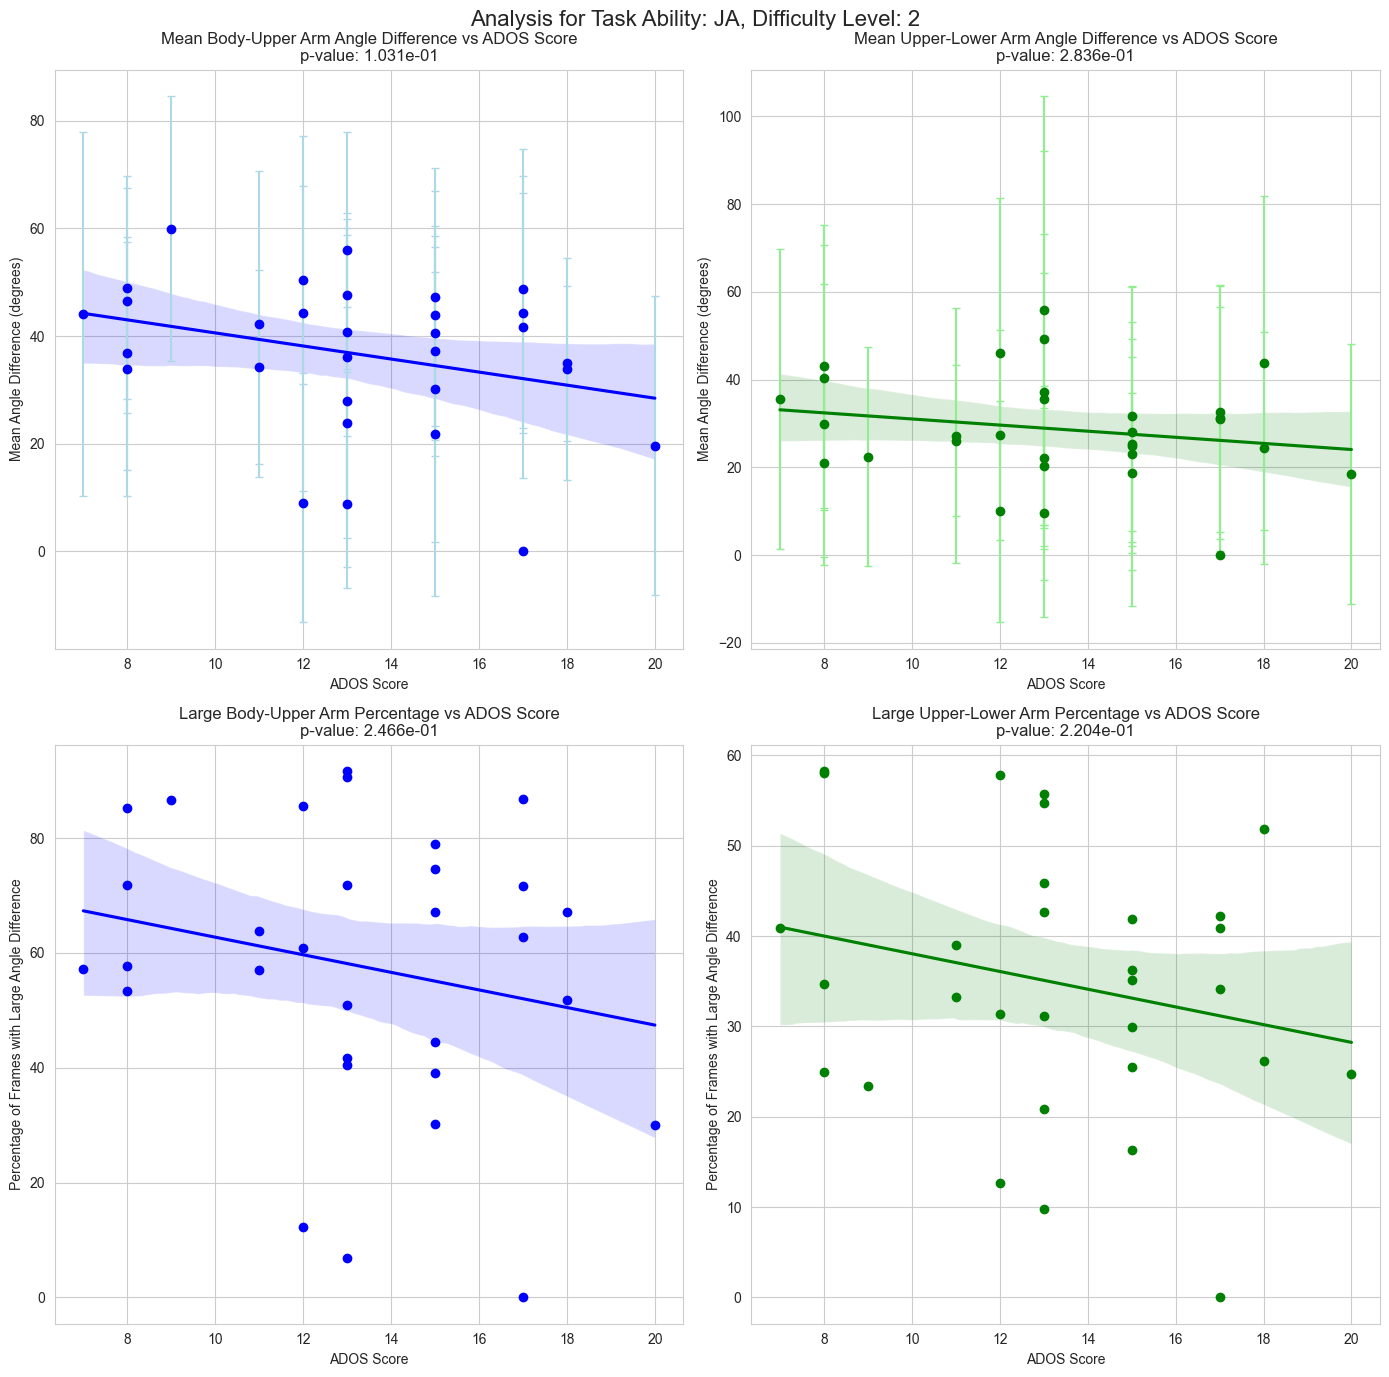

/Users/liyang/Documents/NEU/Capstone/dream-analysis/venv/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/liyang/Documents/NEU/Capstone/dream-analysis/venv/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/liyang/Documents/NEU/Capstone/dream-analysis/venv/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


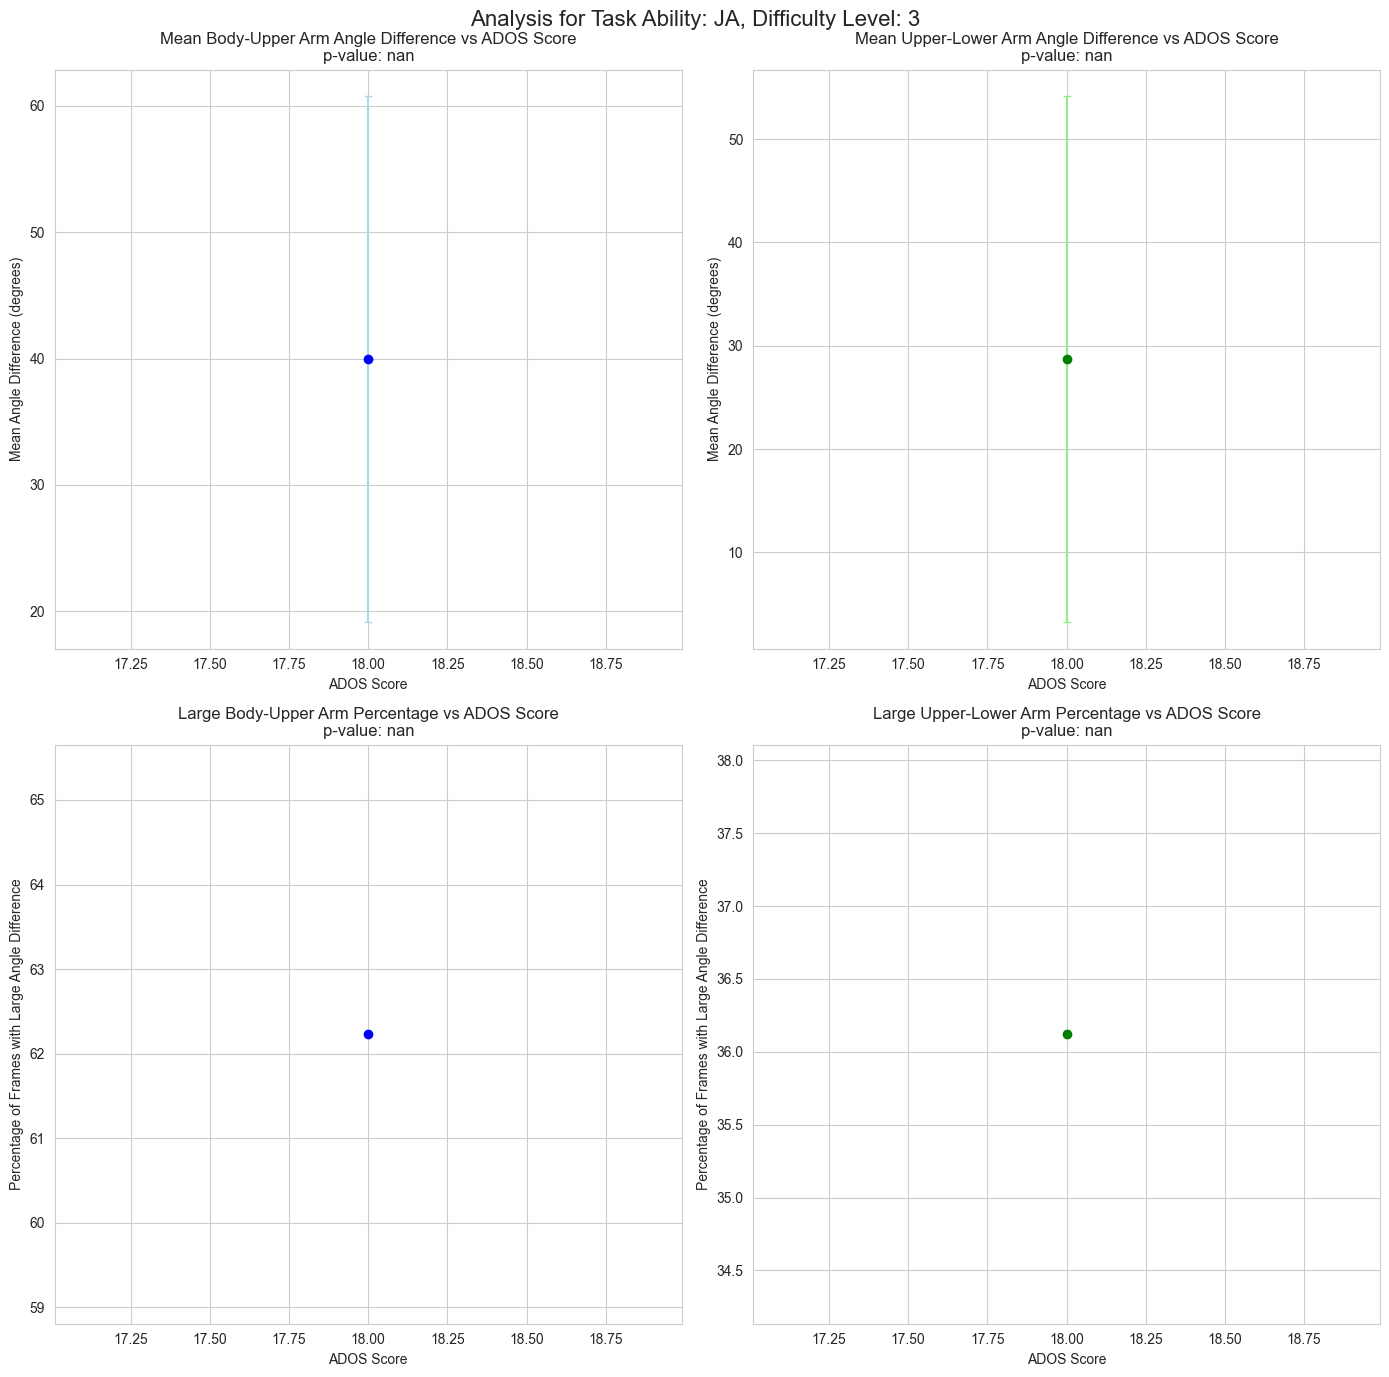

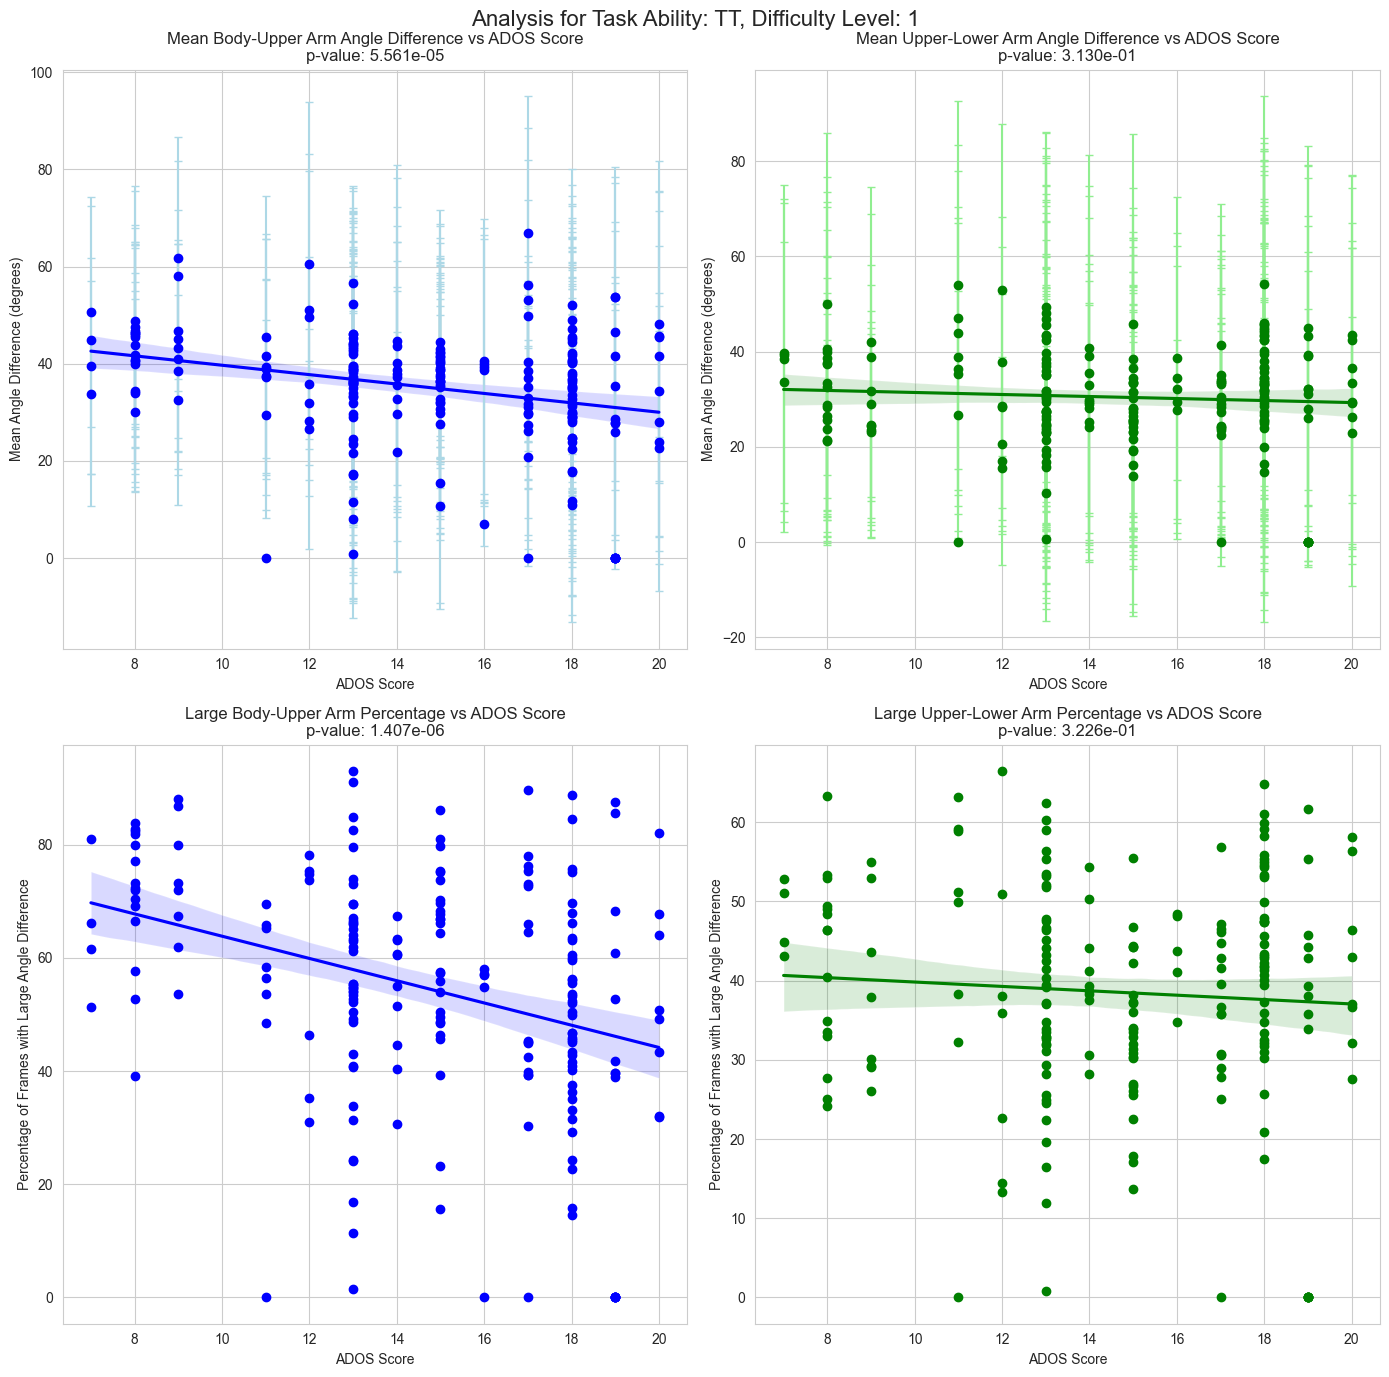

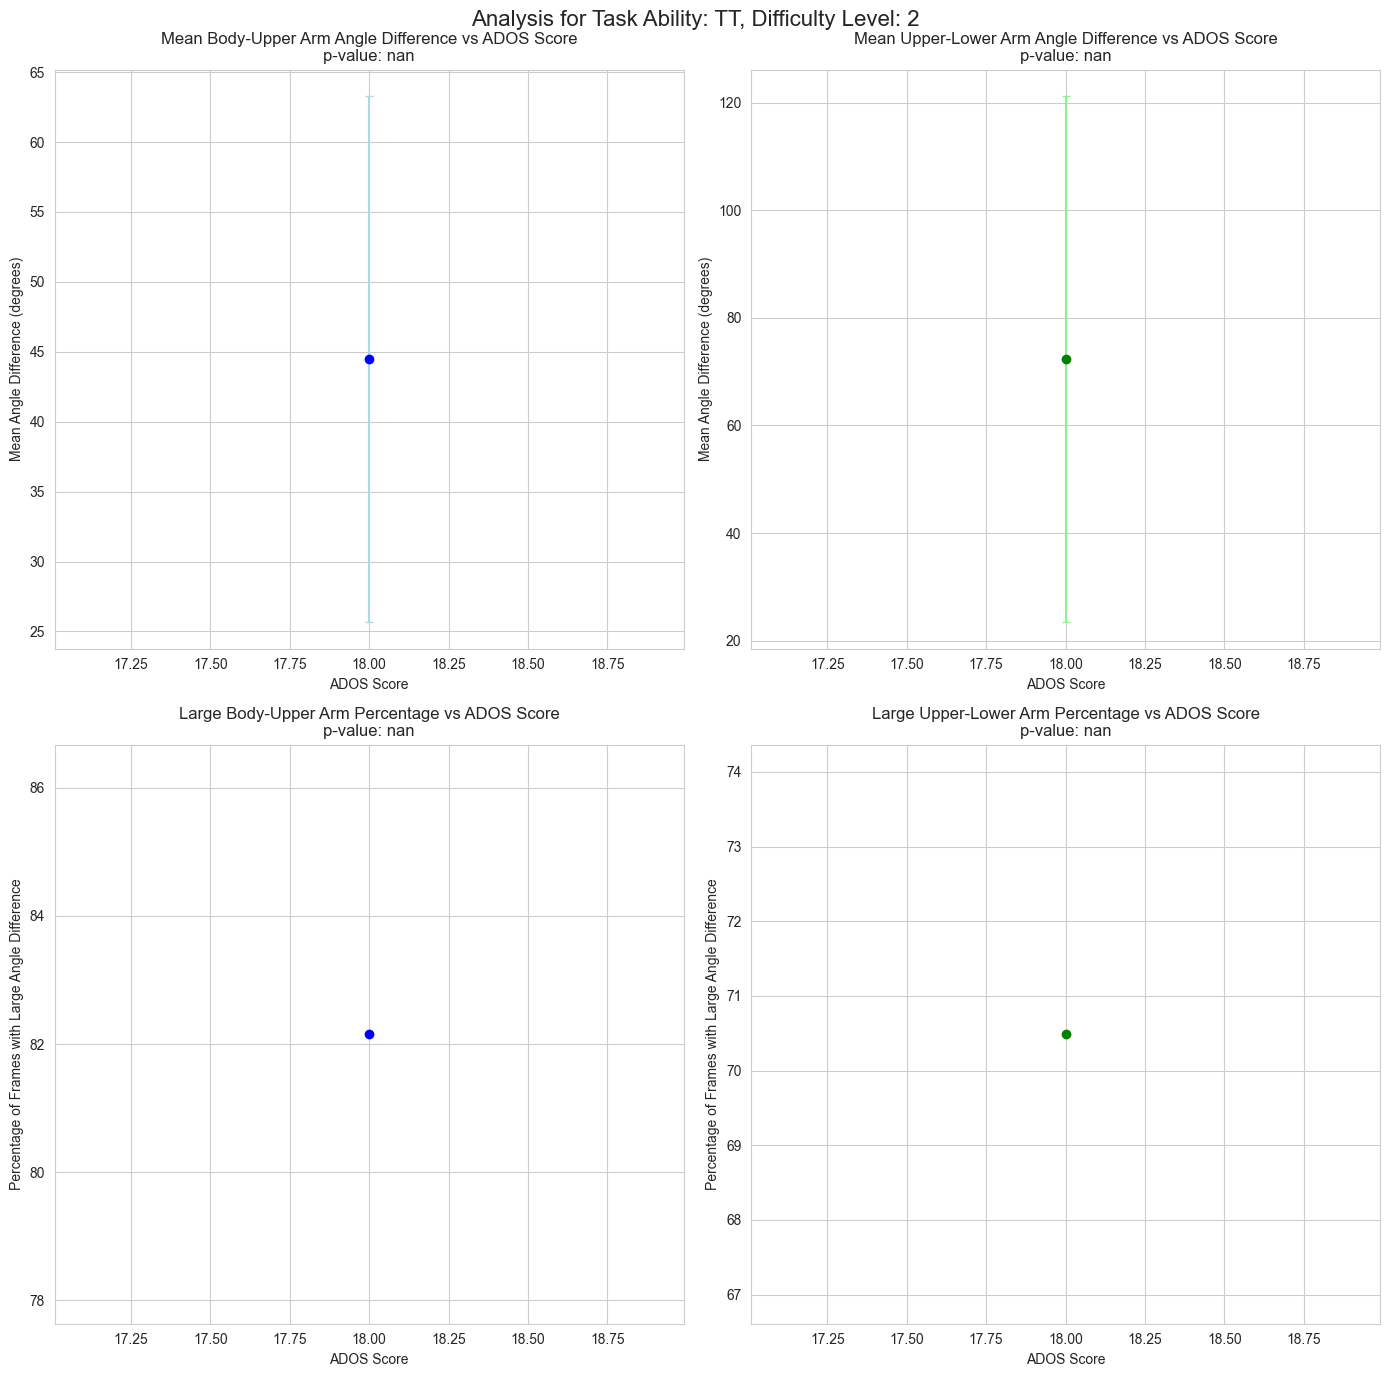

In [9]:
grouped_df = df.groupby(['task_ability', 'task_difficultyLevel'])

# Create plots for each group
for (ability, difficulty), group in grouped_df:
    plt.figure(figsize=(14, 14))
    plt.suptitle(f"Analysis for Task Ability: {ability}, Difficulty Level: {difficulty}", fontsize=16)
    utils.plot_symmetry_vs_ados(group, plt)

## Try different large angle difference threshold

In [10]:
large_angle_diff_threshold_1 = 45

In [11]:
df_1 = utils.prepare_data_for_symmetry_analysis(dataset_root_path, skeleton_keys, large_angle_diff_threshold_1, distribution_visualize)
df_1

User 10 User 10_0_diagnosis abilities_20170508_104619.961000.json {'ability': 'TT', 'difficultyLevel': 1, 'end': 21336, 'index': 0, 'start': 0}
User 10 User 10_15_diagnosis abilities_20170512_110000.912000.json {'ability': 'IM', 'difficultyLevel': 1, 'end': 2232, 'index': 15, 'start': 0}
User 10 User 10_1_diagnosis abilities_20170508_110238.716000.json {'ability': 'TT', 'difficultyLevel': 1, 'end': 5240, 'index': 1, 'start': 0}
User 10 User 10_2_diagnosis abilities_20170508_111028.299000.json {'ability': 'JA', 'difficultyLevel': 1, 'end': 9940, 'index': 2, 'start': 0}
User 10 User 10_3_diagnosis abilities_20170508_112106.830000.json {'ability': 'JA', 'difficultyLevel': 1, 'end': 1293, 'index': 3, 'start': 0}
User 10 User 10_4_diagnosis abilities_20170508_112310.500000.json {'ability': 'TT', 'difficultyLevel': 1, 'end': 25077, 'index': 4, 'start': 0}
User 10 User 10_5_diagnosis abilities_20170510_100110.194000.json {'ability': 'IM', 'difficultyLevel': 1, 'end': 16864, 'index': 5, 'start

ados_score  diff_body_upper_arm_mean  diff_body_upper_arm_std  \
0            14                 35.612456                25.486591   
1            14                 30.483801                14.961211   
2            14                 38.755280                26.265727   
3            14                 24.726583                29.777432   
4            14                 45.476403                29.687821   
..          ...                       ...                      ...   
340          17                 31.117505                22.915064   
341          17                 31.797160                17.510278   
342          17                 36.962284                14.908601   
343          17                 44.329633                22.359433   
344          17                 38.538716                22.298524   

     diff_upper_lower_arm_mean  diff_upper_lower_arm_std  \
0                    25.309382                 29.494355   
1                    24.482643                 23.058223   
2                    29.870811                 30.544653   
3                    28.370463                 37.787130   
4                    47.155000                 42.414365   
..                         ...                       ...   
340                  29.850866                 28.352067   
341                  24.045675                 23.089388   
342                  24.477546                 21.330859   
343                  30.980152                 25.627071   
344                  23.561649                 22.424756   

     large_diff_body_upper_arm_percentage  \
0                               33.990400   
1                               18.413978   
2                               37.228464   
3                               24.683925   
4                               42.150039   
..                                    ...   
340                             21.854138   
341                             18.981589   
342                             19.717090   
343                             31.822196   
344                             34.152750   

     large_diff_upper_lower_arm_percentage task_ability  task_difficultyLevel  
0                                19.250664           TT                     1  
1                                19.892473           IM                     1  
2                                22.996255           TT                     1  
3                                26.359623           JA                     1  
4                                38.824439           JA                     1  
..                                     ...          ...                   ...  
340                              23.340471           TT                     1  
341                              15.713120           TT                     1  
342                              15.790993           TT                     1  
343                              26.641154           JA                     2  
344                              15.822056           TT                     1  

[345 rows x 9 columns]

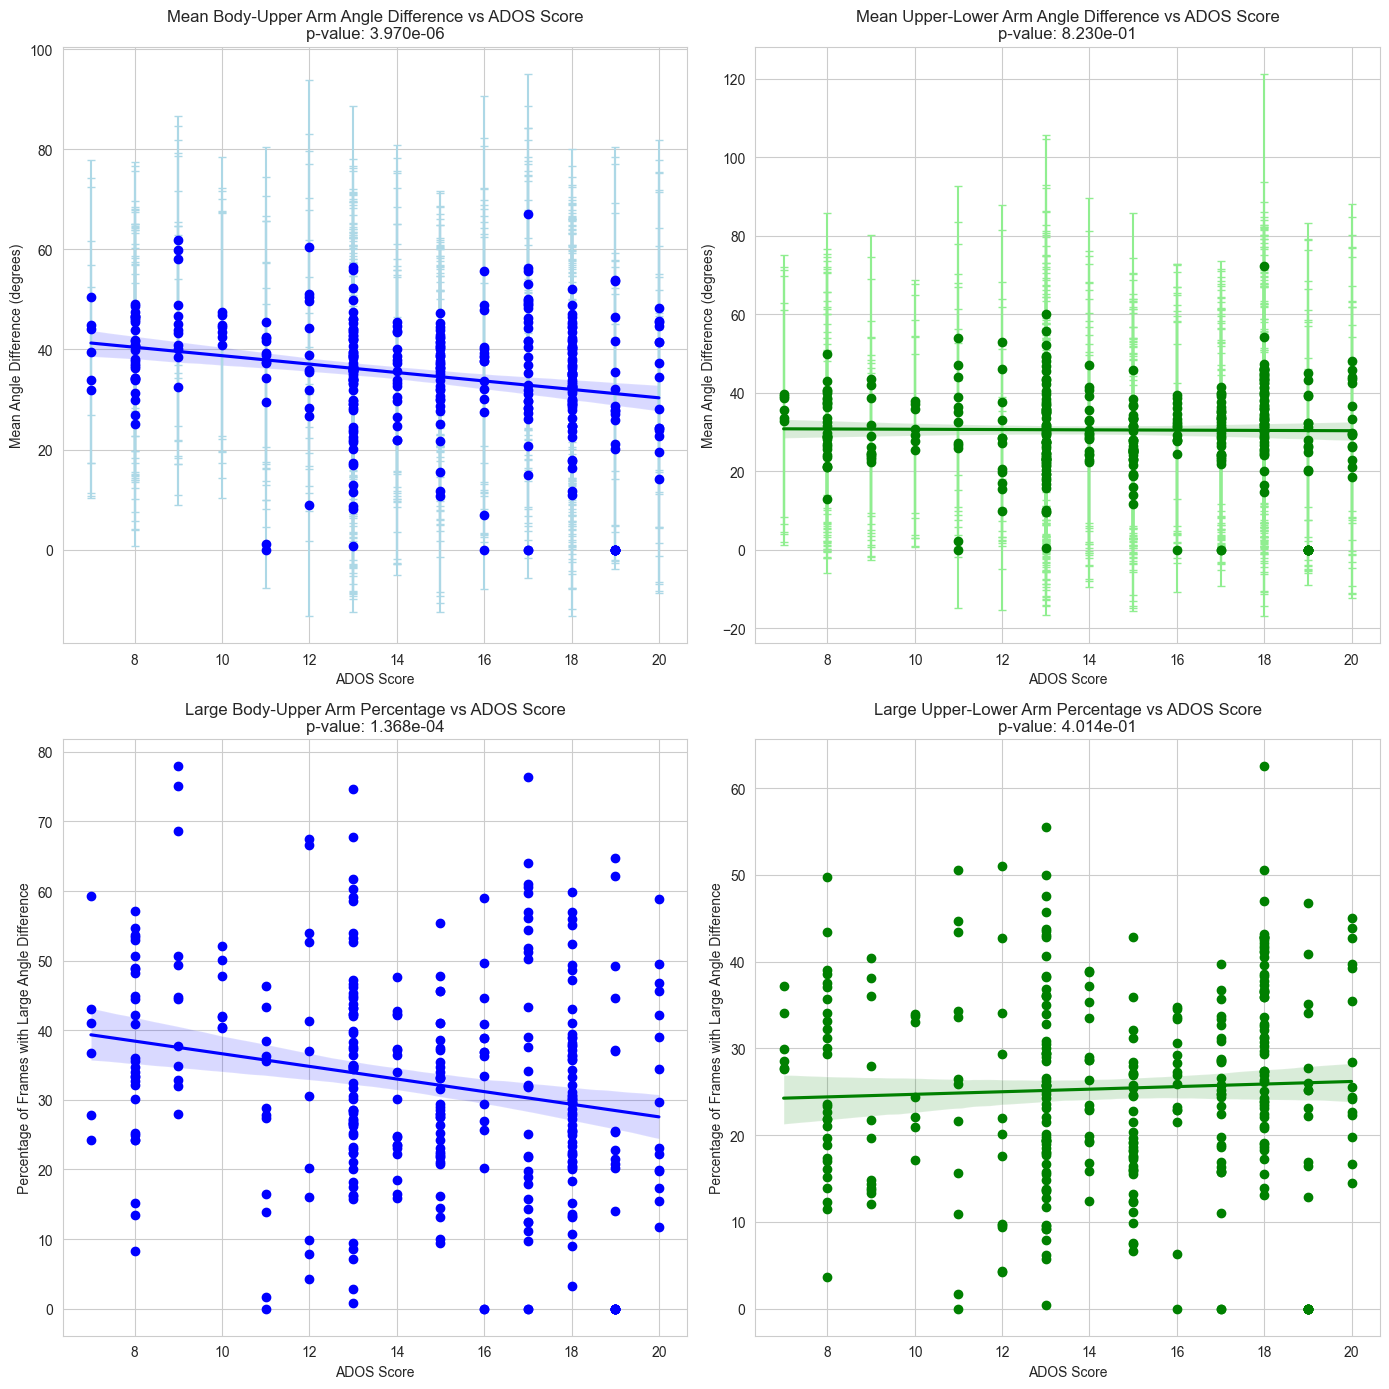

In [12]:
plt.figure(figsize=(14, 14))
utils.plot_symmetry_vs_ados(df_1, plt)

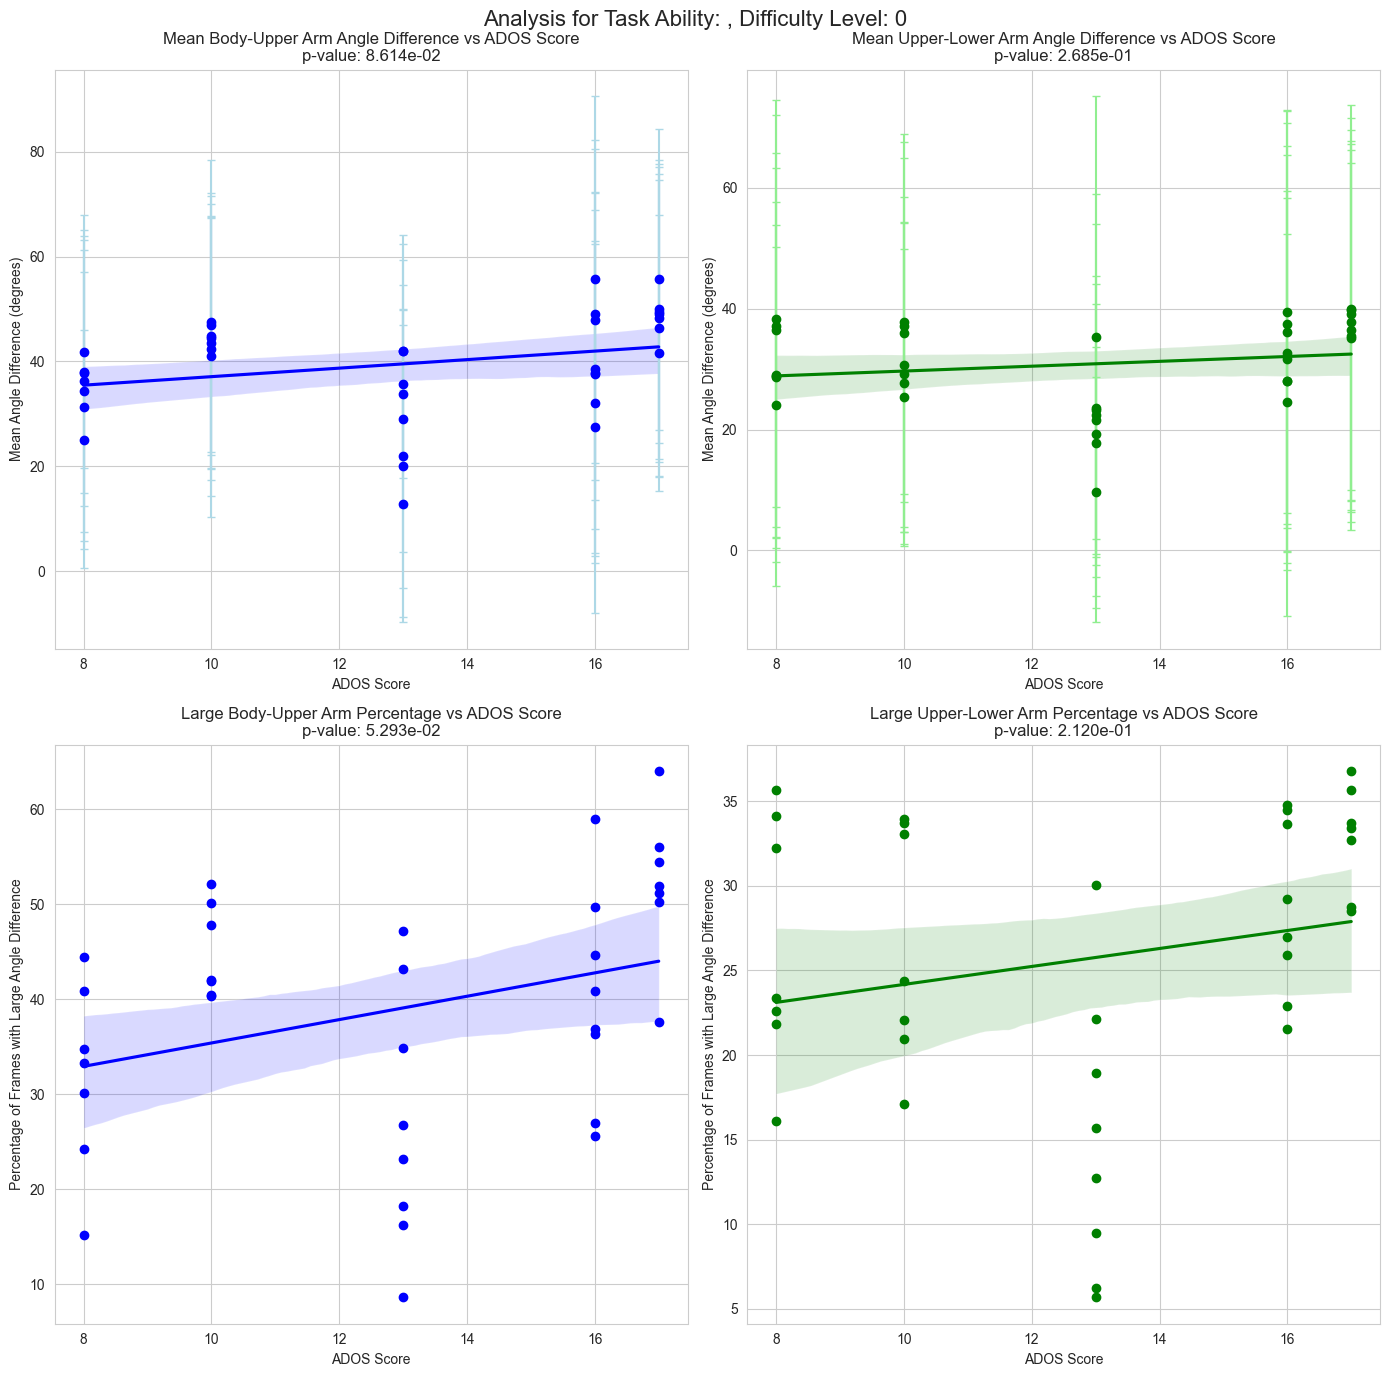

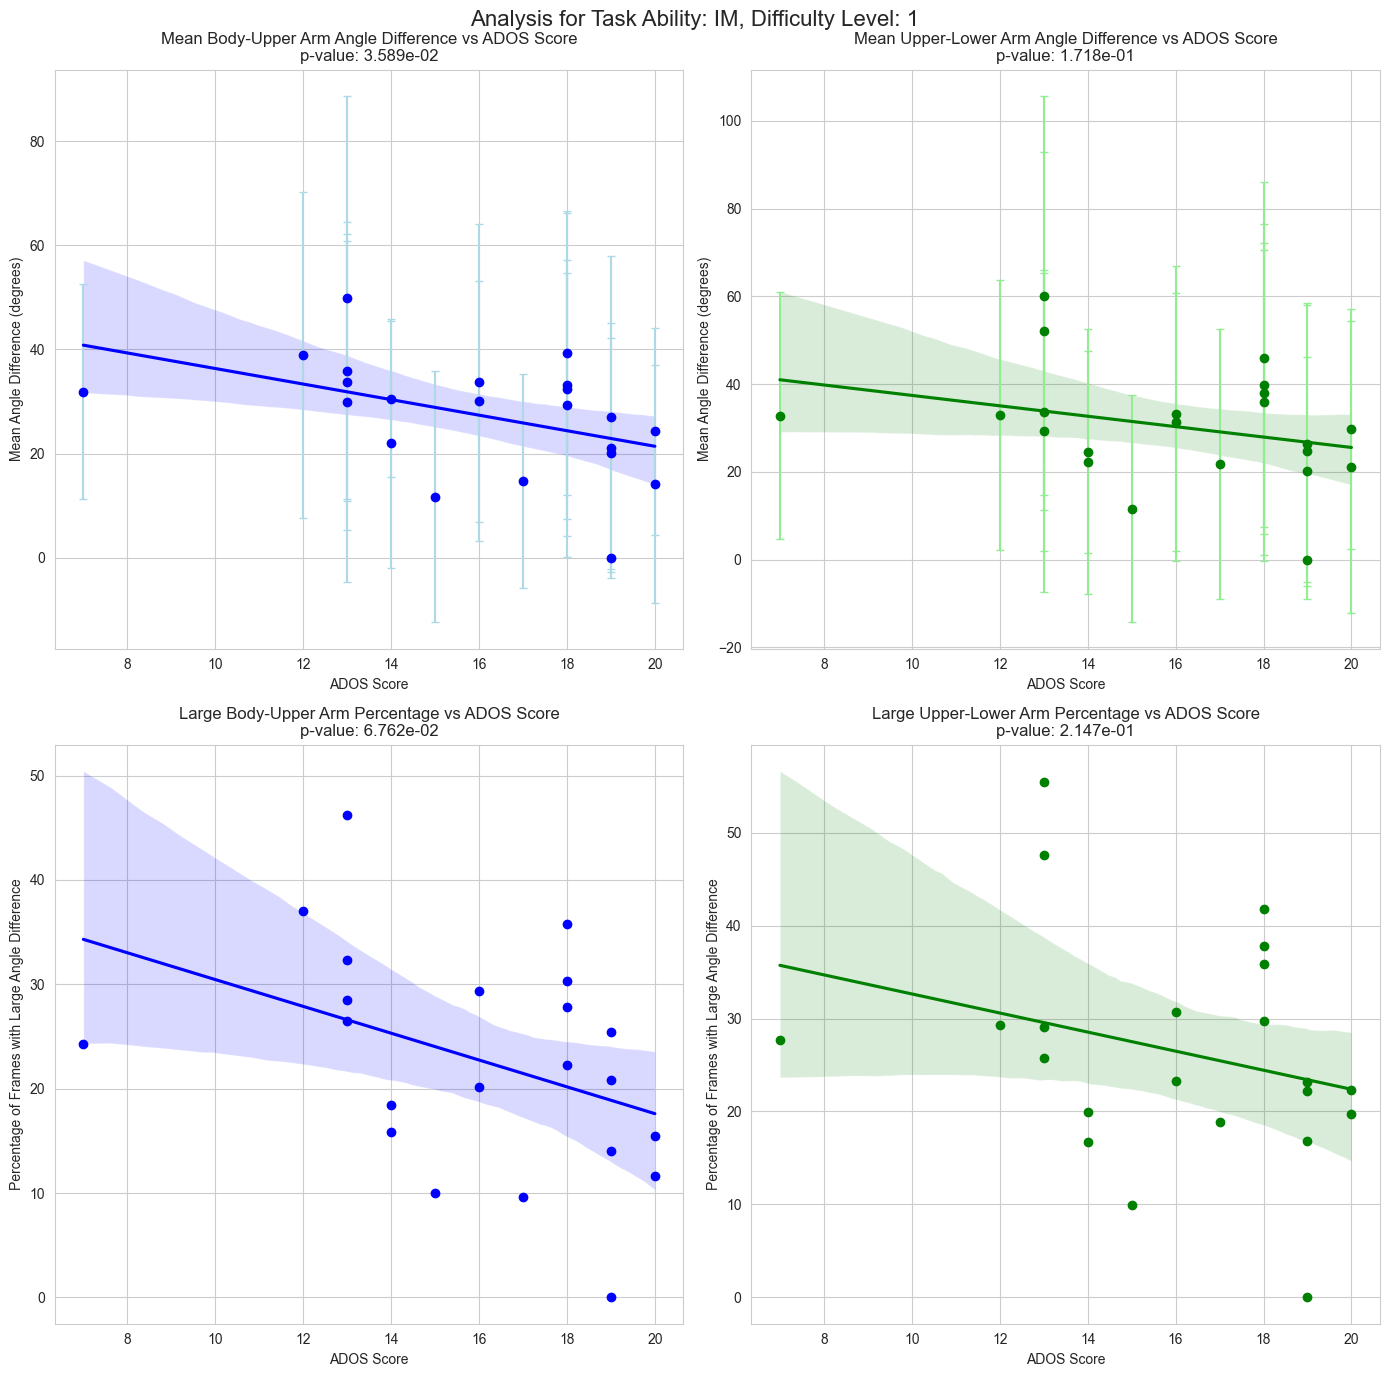

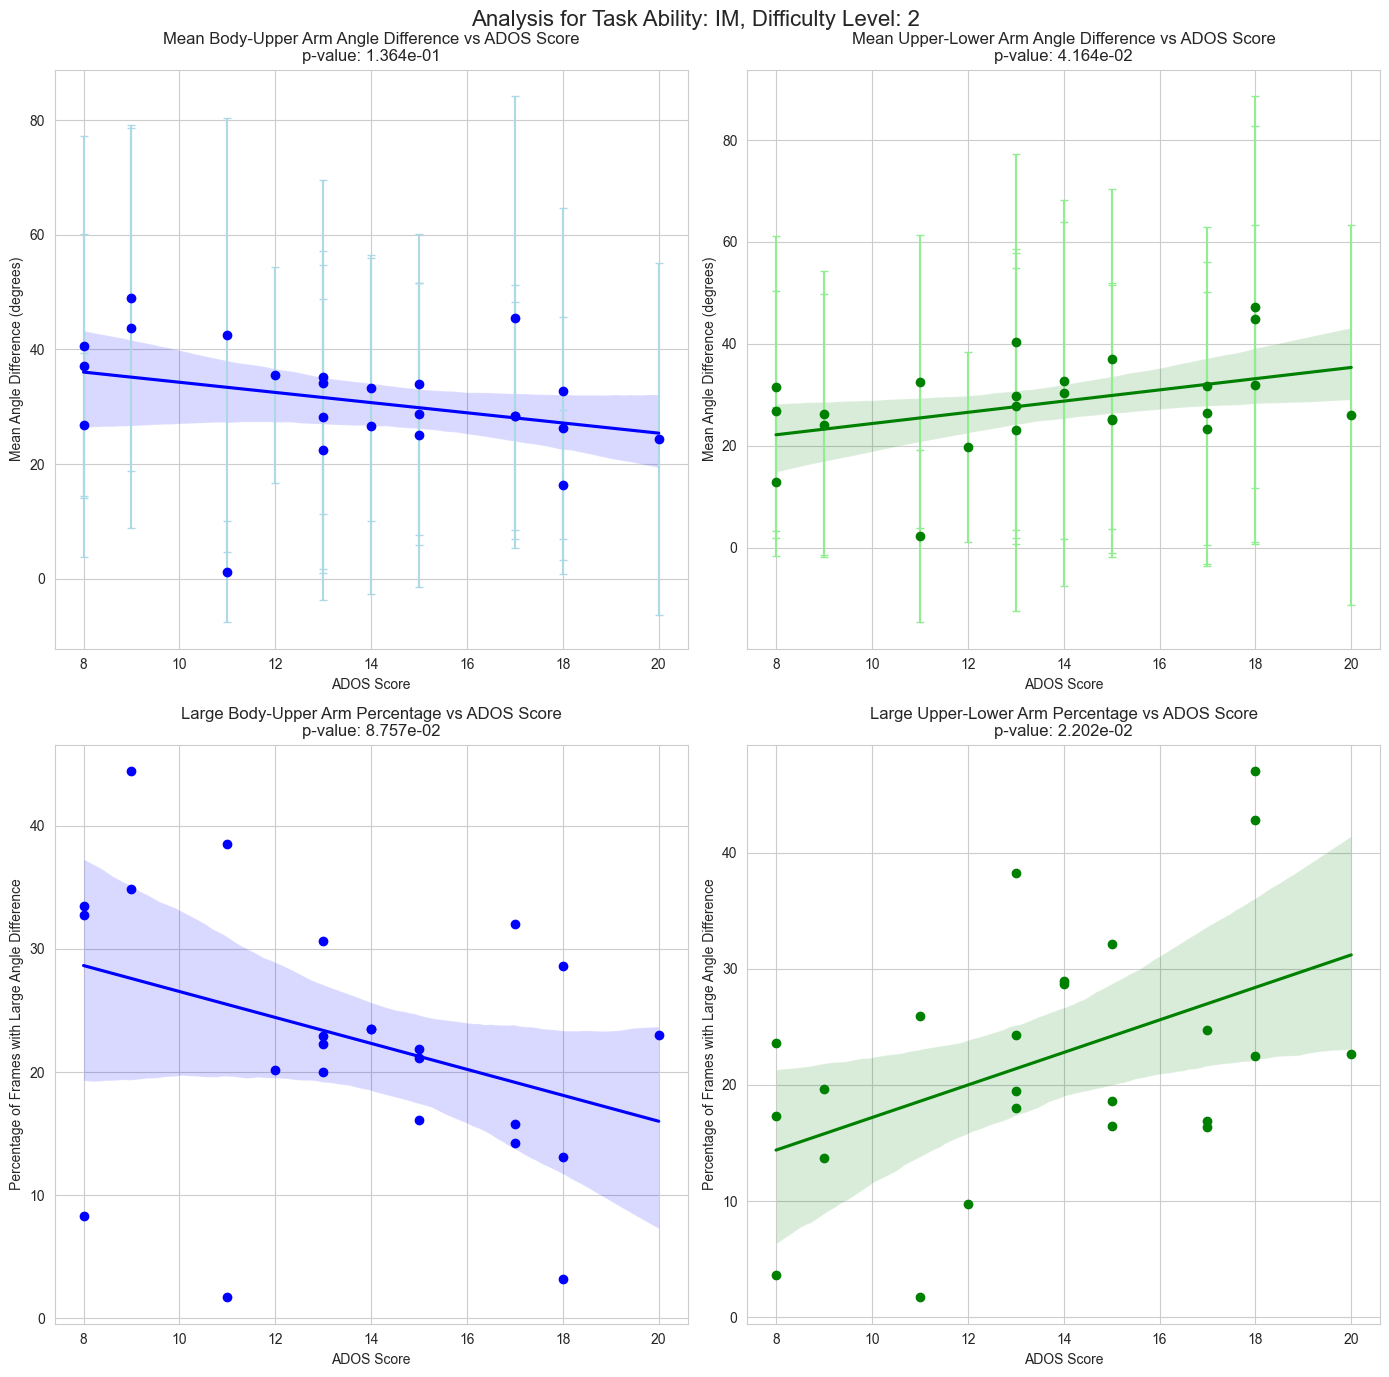

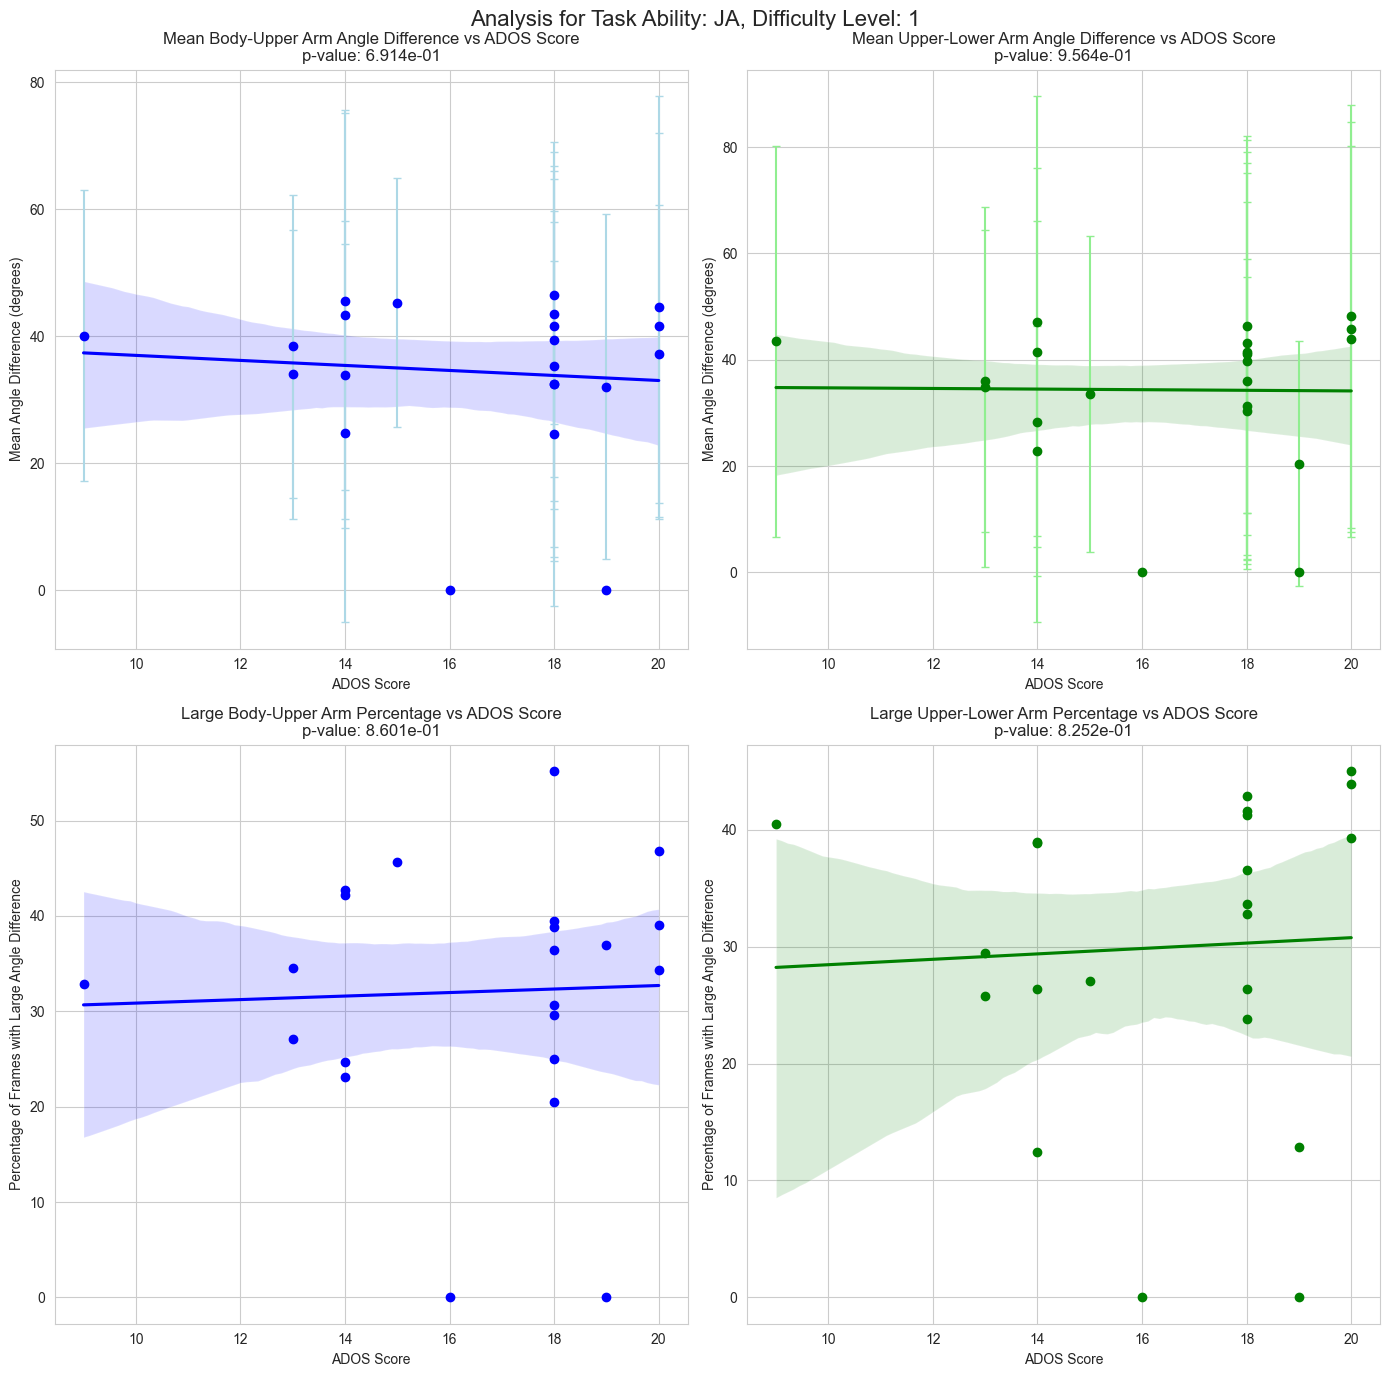

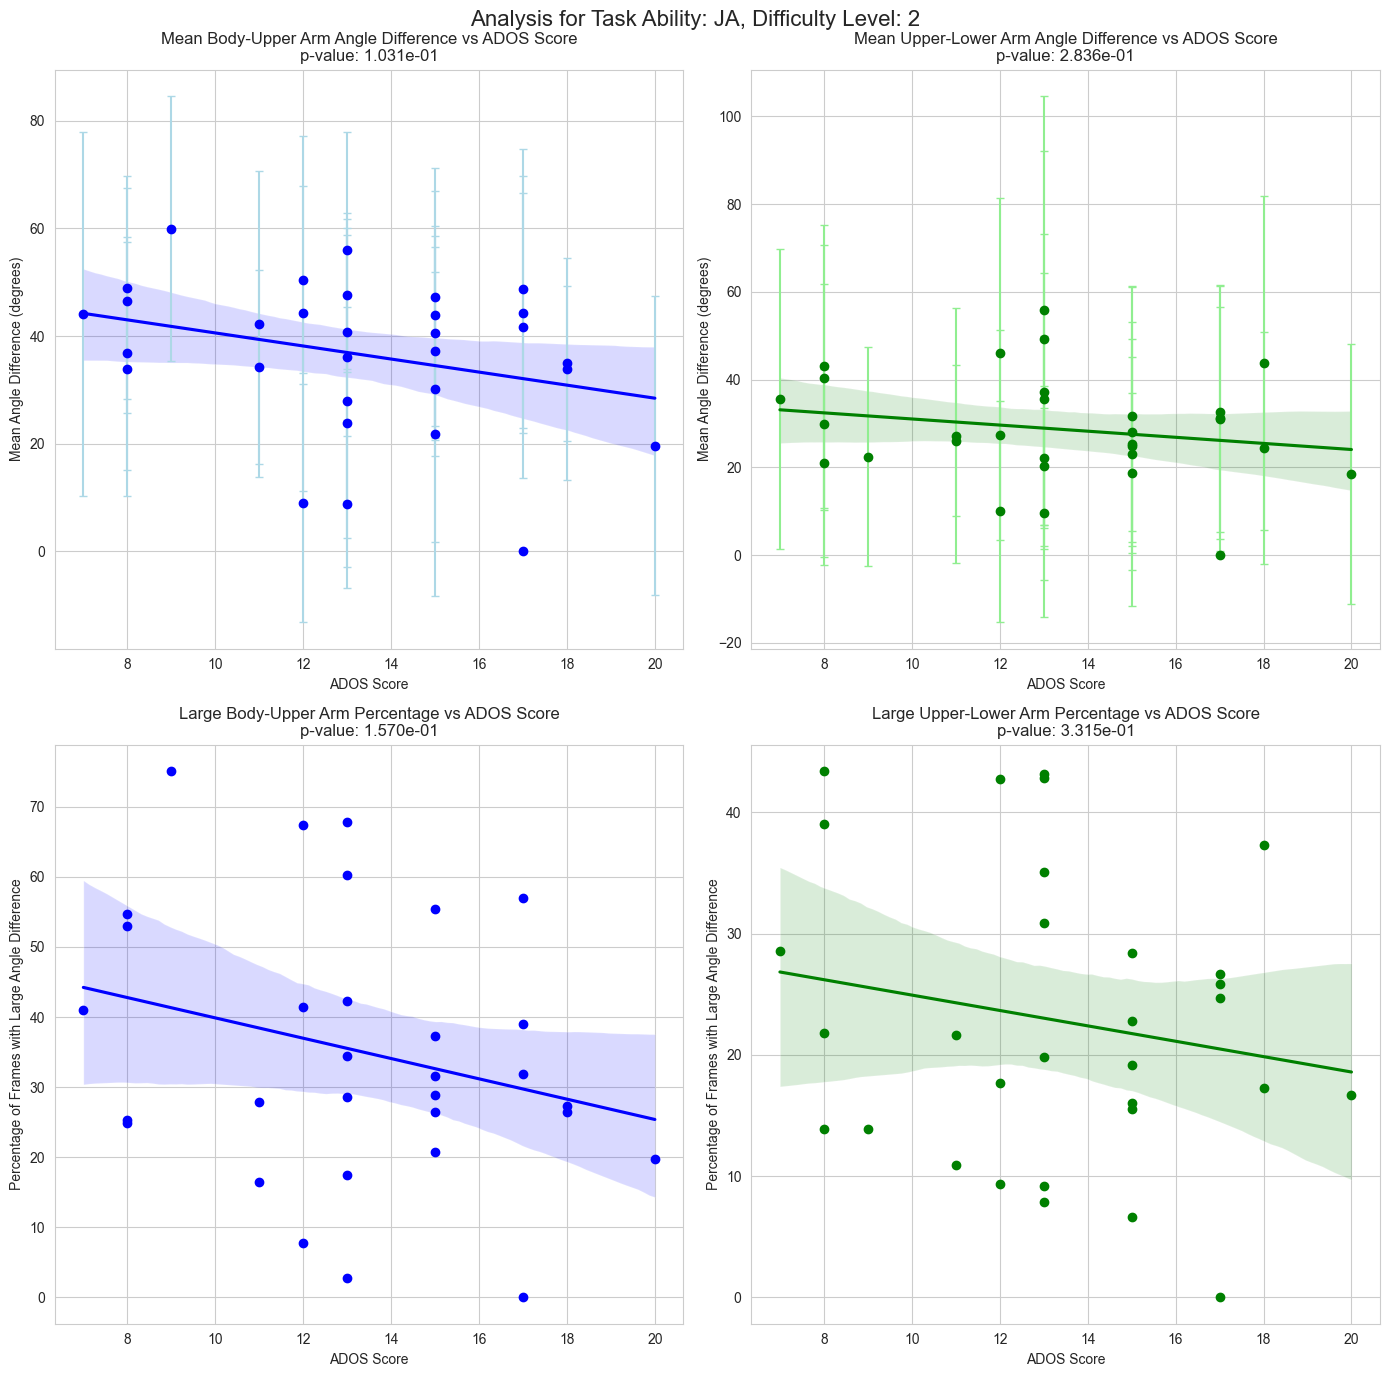

/Users/liyang/Documents/NEU/Capstone/dream-analysis/venv/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/liyang/Documents/NEU/Capstone/dream-analysis/venv/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/liyang/Documents/NEU/Capstone/dream-analysis/venv/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


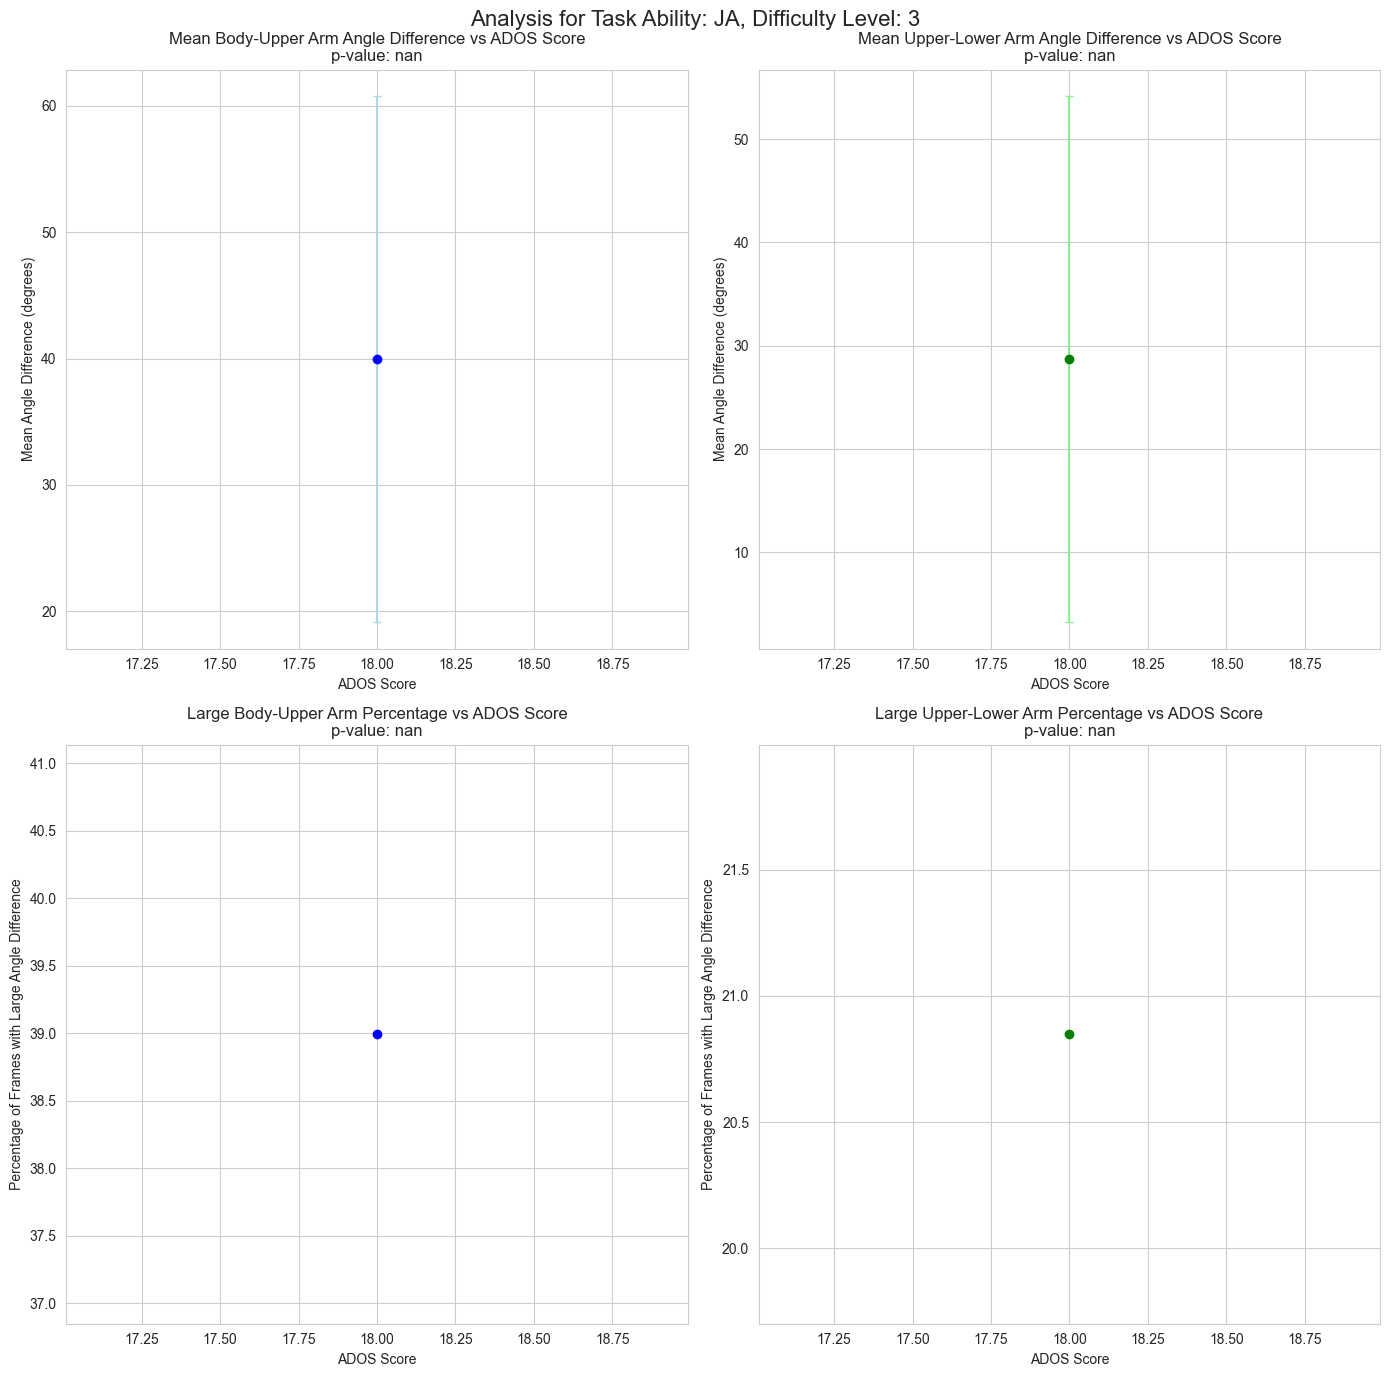

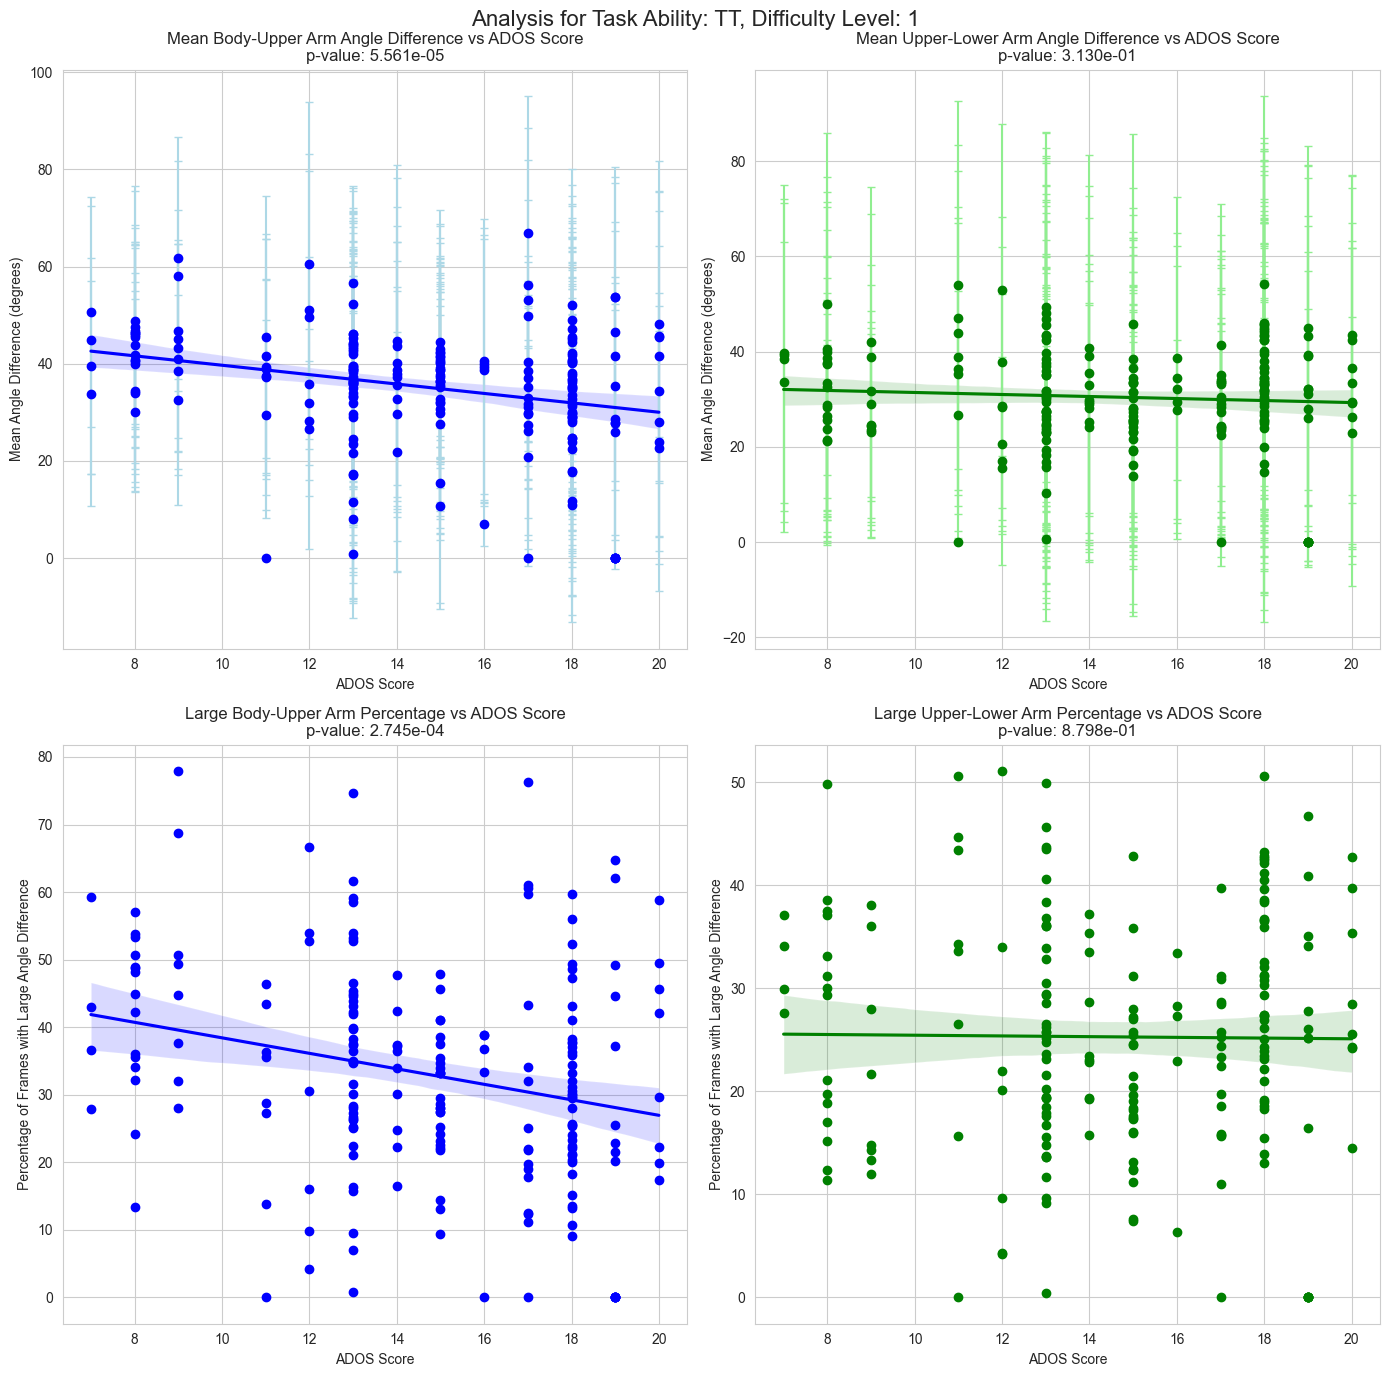

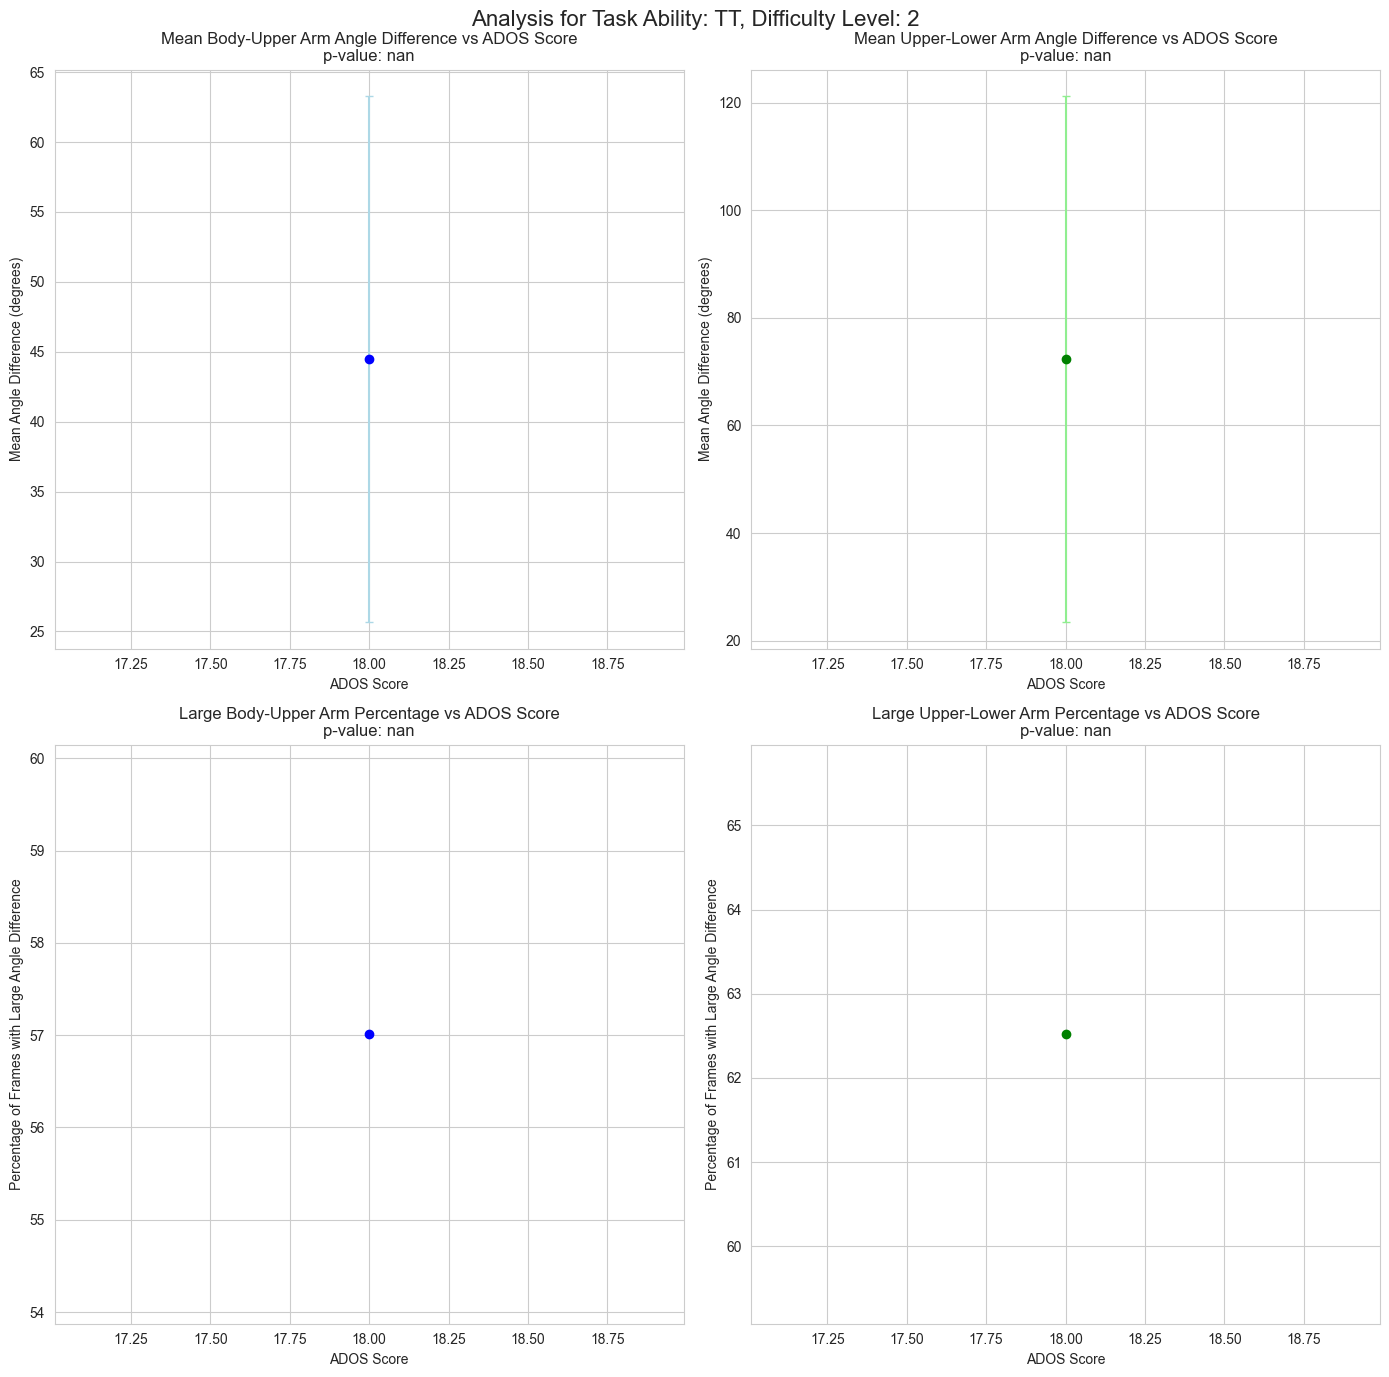

In [13]:
grouped_df_1 = df_1.groupby(['task_ability', 'task_difficultyLevel'])

# Create plots for each group
for (ability, difficulty), group in grouped_df_1:
    plt.figure(figsize=(14, 14))
    plt.suptitle(f"Analysis for Task Ability: {ability}, Difficulty Level: {difficulty}", fontsize=16)
    utils.plot_symmetry_vs_ados(group, plt)

In [14]:
large_angle_diff_threshold_2 = 60

In [15]:
df_2 = utils.prepare_data_for_symmetry_analysis(dataset_root_path, skeleton_keys, large_angle_diff_threshold_2, distribution_visualize)
df_2

User 10 User 10_0_diagnosis abilities_20170508_104619.961000.json {'ability': 'TT', 'difficultyLevel': 1, 'end': 21336, 'index': 0, 'start': 0}
User 10 User 10_15_diagnosis abilities_20170512_110000.912000.json {'ability': 'IM', 'difficultyLevel': 1, 'end': 2232, 'index': 15, 'start': 0}
User 10 User 10_1_diagnosis abilities_20170508_110238.716000.json {'ability': 'TT', 'difficultyLevel': 1, 'end': 5240, 'index': 1, 'start': 0}
User 10 User 10_2_diagnosis abilities_20170508_111028.299000.json {'ability': 'JA', 'difficultyLevel': 1, 'end': 9940, 'index': 2, 'start': 0}
User 10 User 10_3_diagnosis abilities_20170508_112106.830000.json {'ability': 'JA', 'difficultyLevel': 1, 'end': 1293, 'index': 3, 'start': 0}
User 10 User 10_4_diagnosis abilities_20170508_112310.500000.json {'ability': 'TT', 'difficultyLevel': 1, 'end': 25077, 'index': 4, 'start': 0}
User 10 User 10_5_diagnosis abilities_20170510_100110.194000.json {'ability': 'IM', 'difficultyLevel': 1, 'end': 16864, 'index': 5, 'start

ados_score  diff_body_upper_arm_mean  diff_body_upper_arm_std  \
0            14                 35.612456                25.486591   
1            14                 30.483801                14.961211   
2            14                 38.755280                26.265727   
3            14                 24.726583                29.777432   
4            14                 45.476403                29.687821   
..          ...                       ...                      ...   
340          17                 31.117505                22.915064   
341          17                 31.797160                17.510278   
342          17                 36.962284                14.908601   
343          17                 44.329633                22.359433   
344          17                 38.538716                22.298524   

     diff_upper_lower_arm_mean  diff_upper_lower_arm_std  \
0                    25.309382                 29.494355   
1                    24.482643                 23.058223   
2                    29.870811                 30.544653   
3                    28.370463                 37.787130   
4                    47.155000                 42.414365   
..                         ...                       ...   
340                  29.850866                 28.352067   
341                  24.045675                 23.089388   
342                  24.477546                 21.330859   
343                  30.980152                 25.627071   
344                  23.561649                 22.424756   

     large_diff_body_upper_arm_percentage  \
0                               15.247682   
1                                3.942652   
2                               19.756554   
3                               14.699980   
4                               24.593968   
..                                    ...   
340                             11.424613   
341                              7.917735   
342                              5.990185   
343                             15.307624   
344                             14.760294   

     large_diff_upper_lower_arm_percentage task_ability  task_difficultyLevel  
0                                12.405051           TT                     1  
1                                10.618280           IM                     1  
2                                15.000000           TT                     1  
3                                19.024684           JA                     1  
4                                30.935808           JA                     1  
..                                     ...          ...                   ...  
340                              13.994206           TT                     1  
341                               8.197390           TT                     1  
342                               8.646074           TT                     1  
343                              18.957904           JA                     2  
344                               7.036424           TT                     1  

[345 rows x 9 columns]

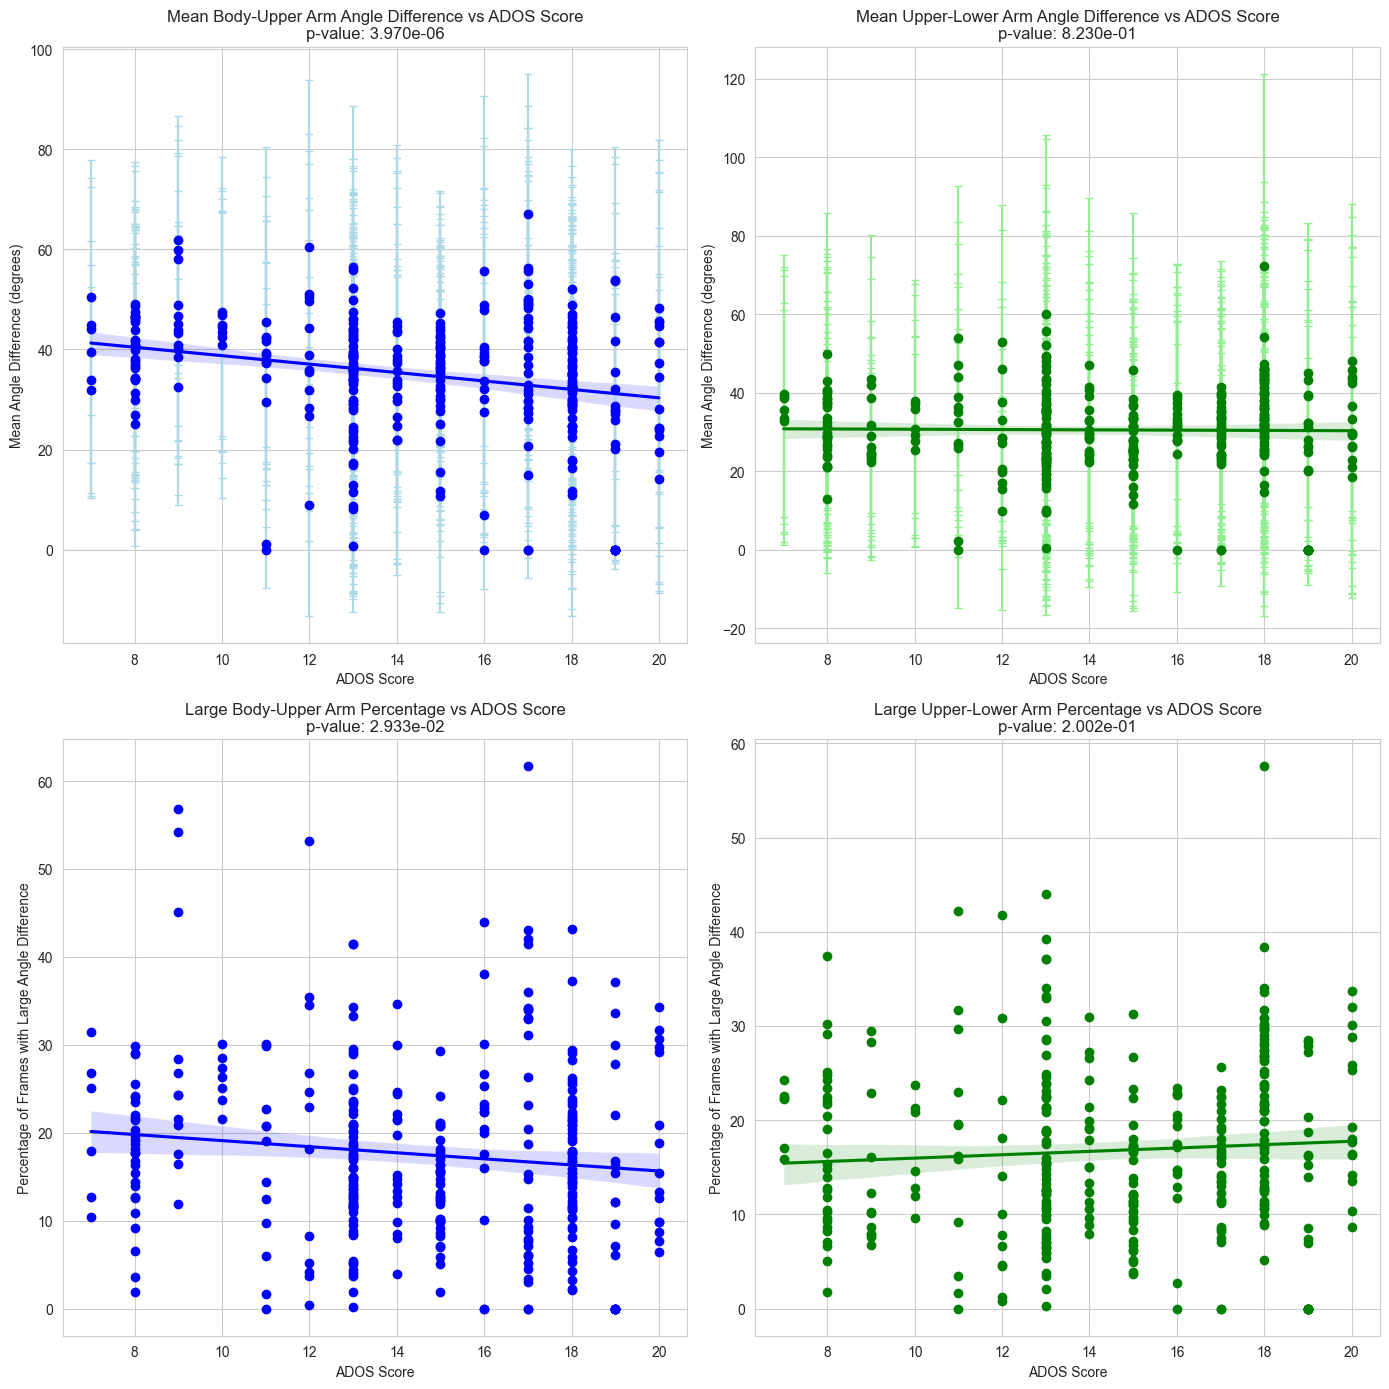

In [16]:
plt.figure(figsize=(14, 14))
utils.plot_symmetry_vs_ados(df_2, plt)

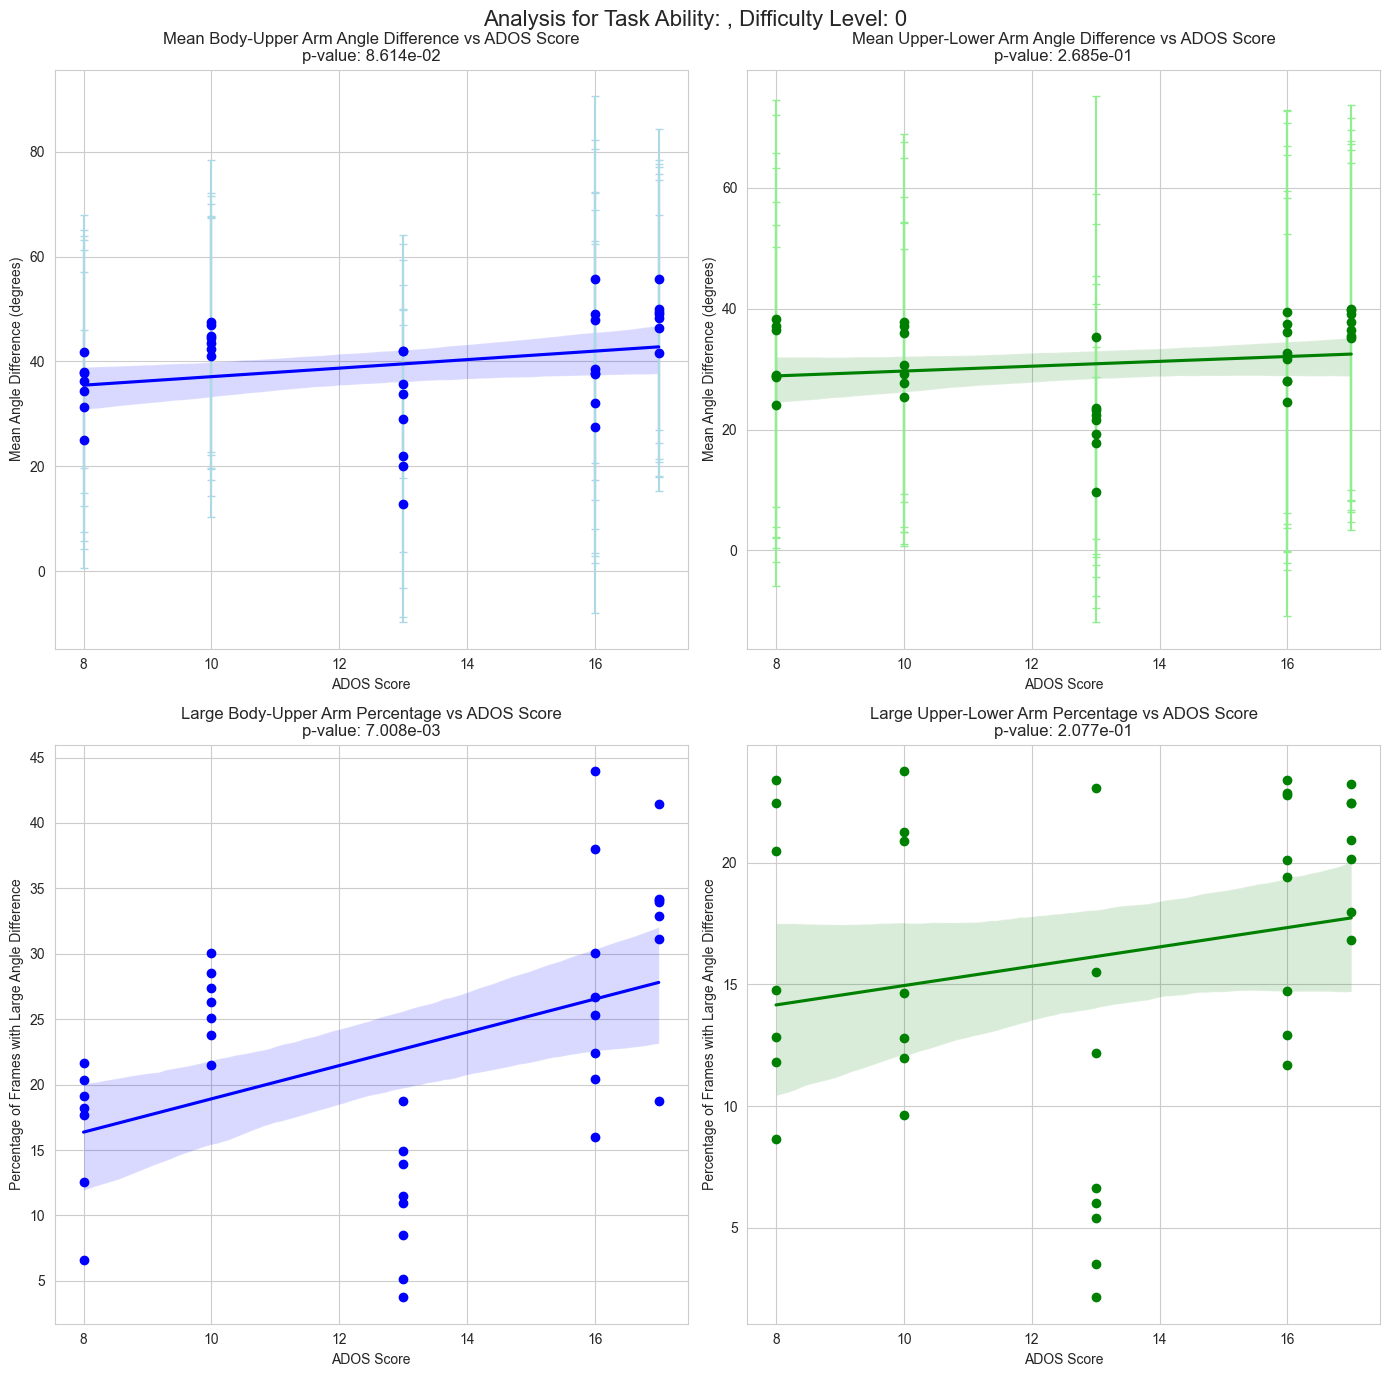

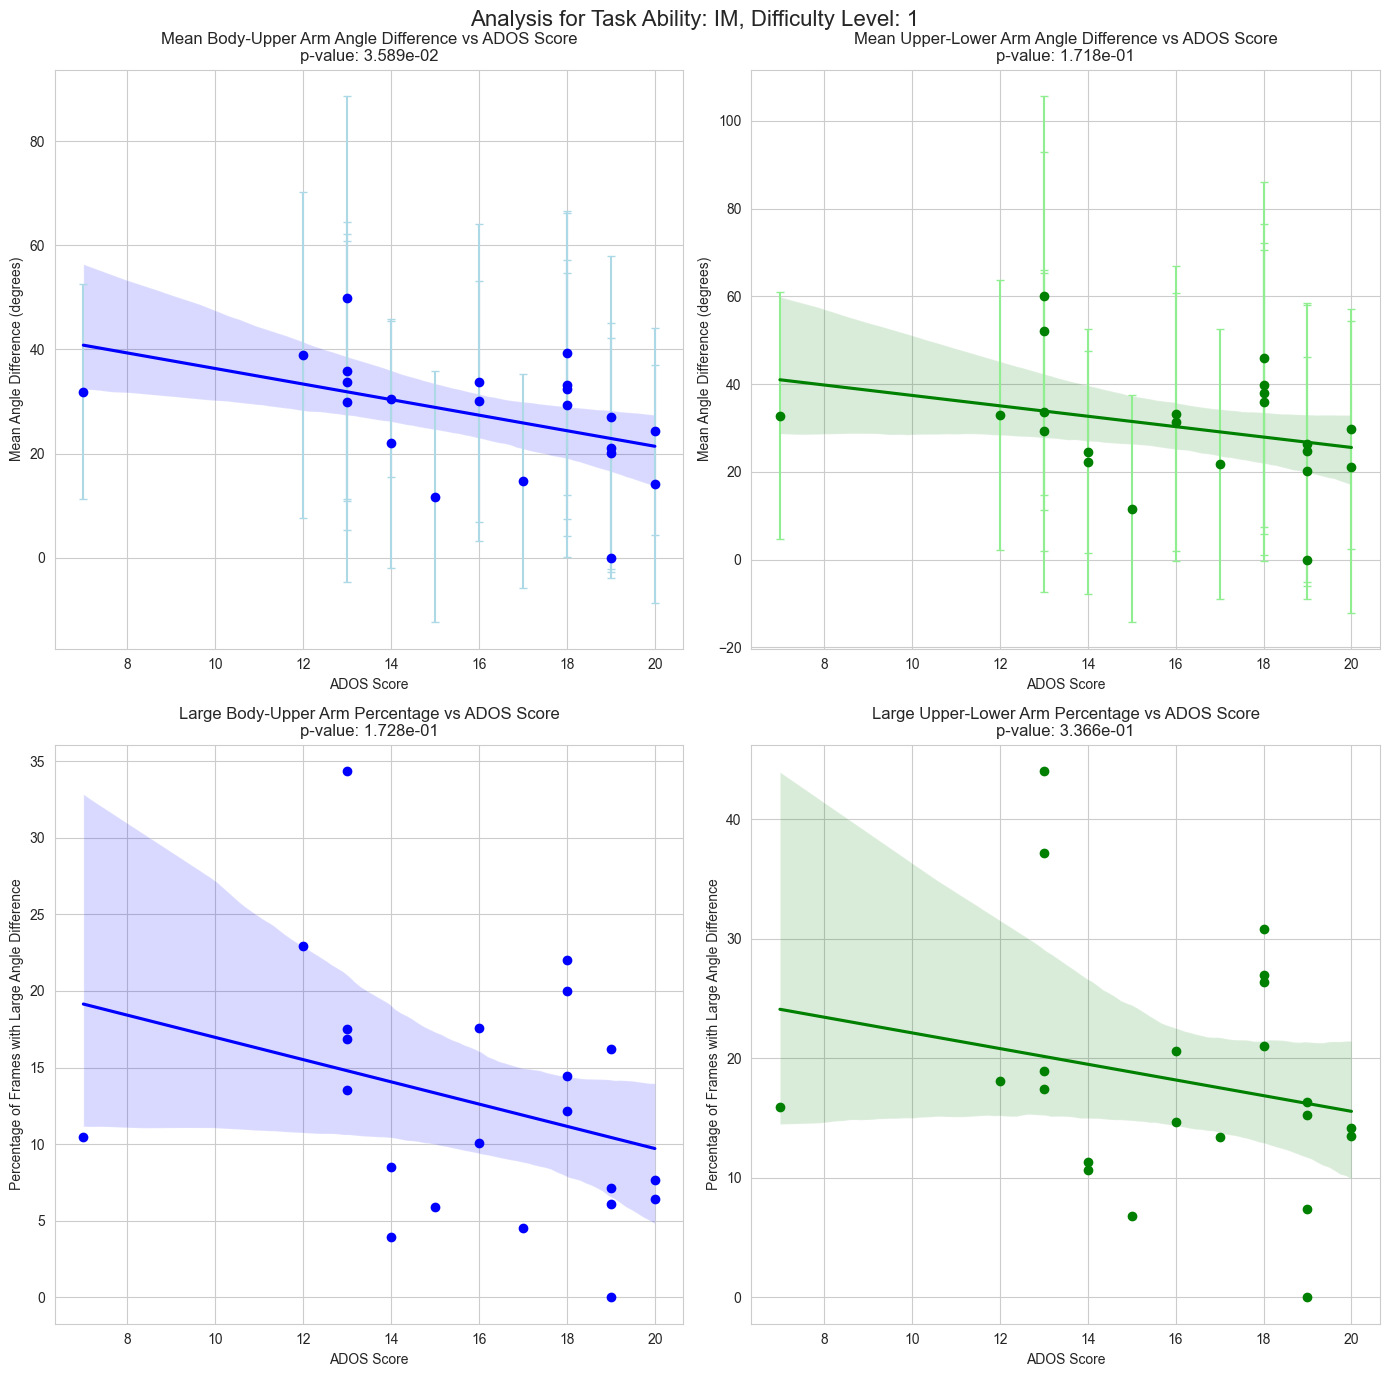

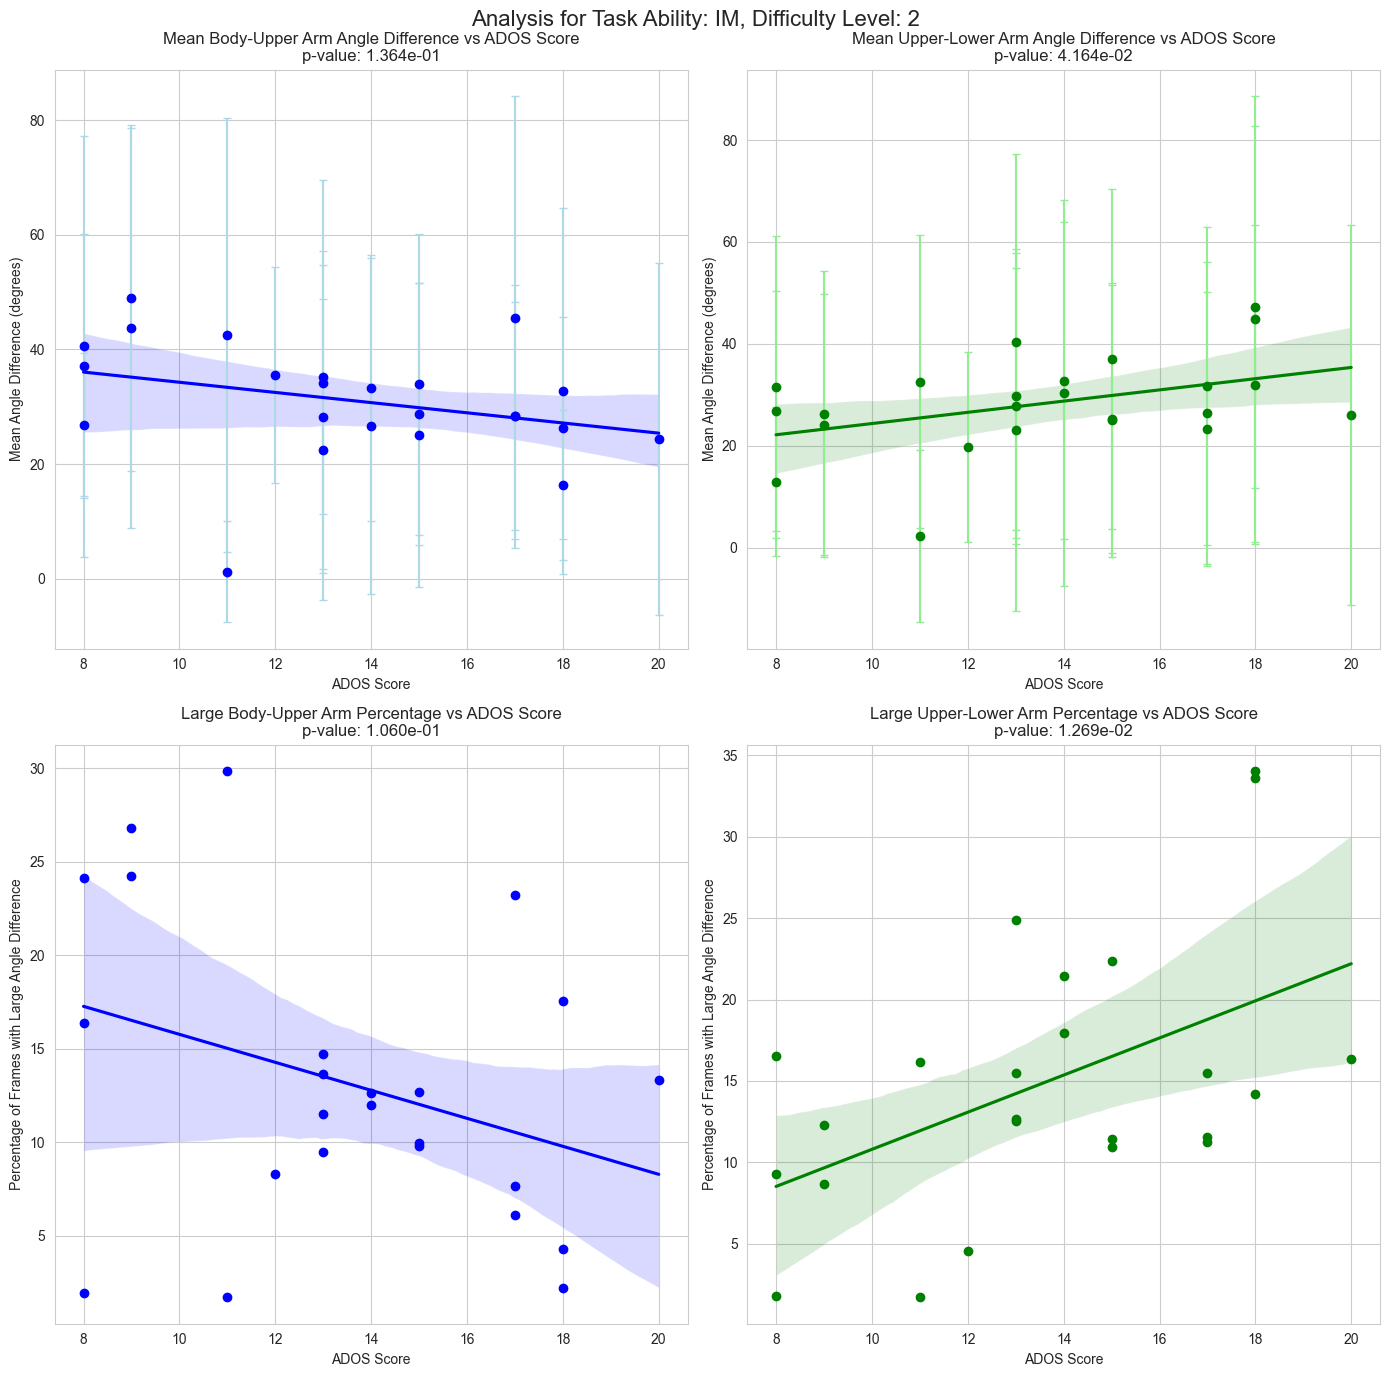

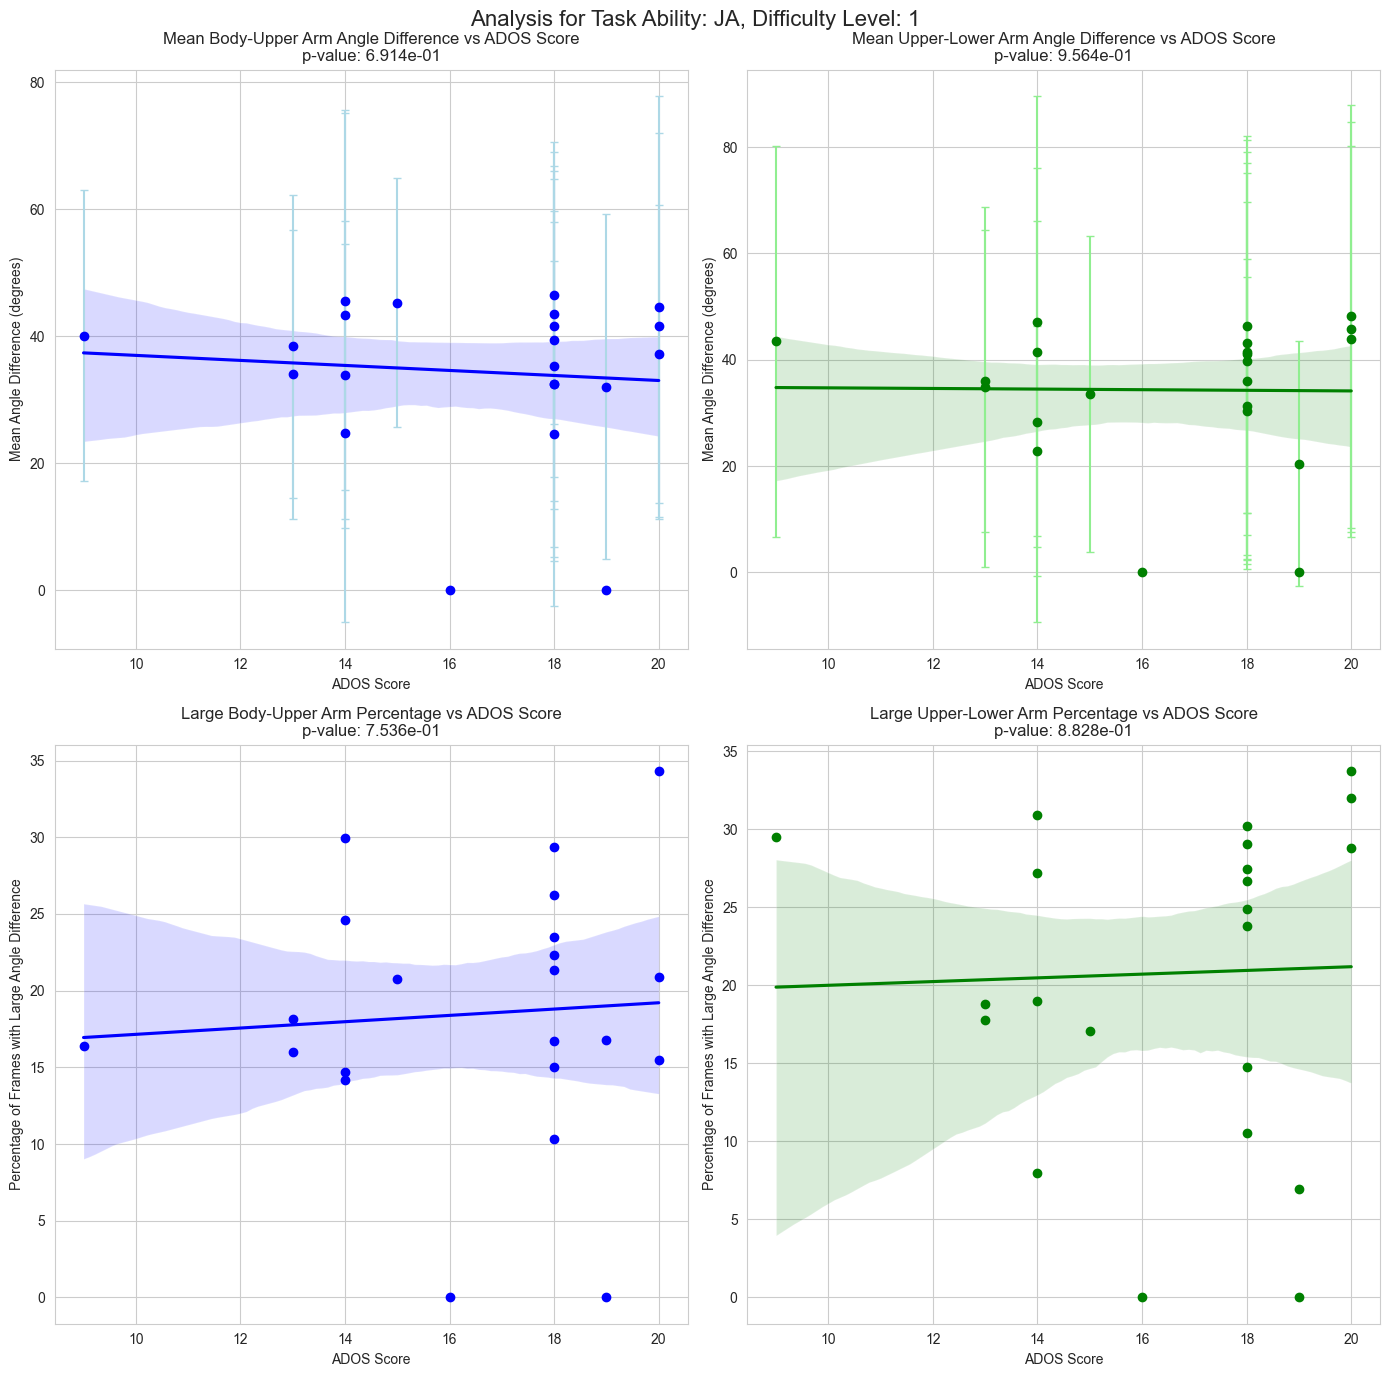

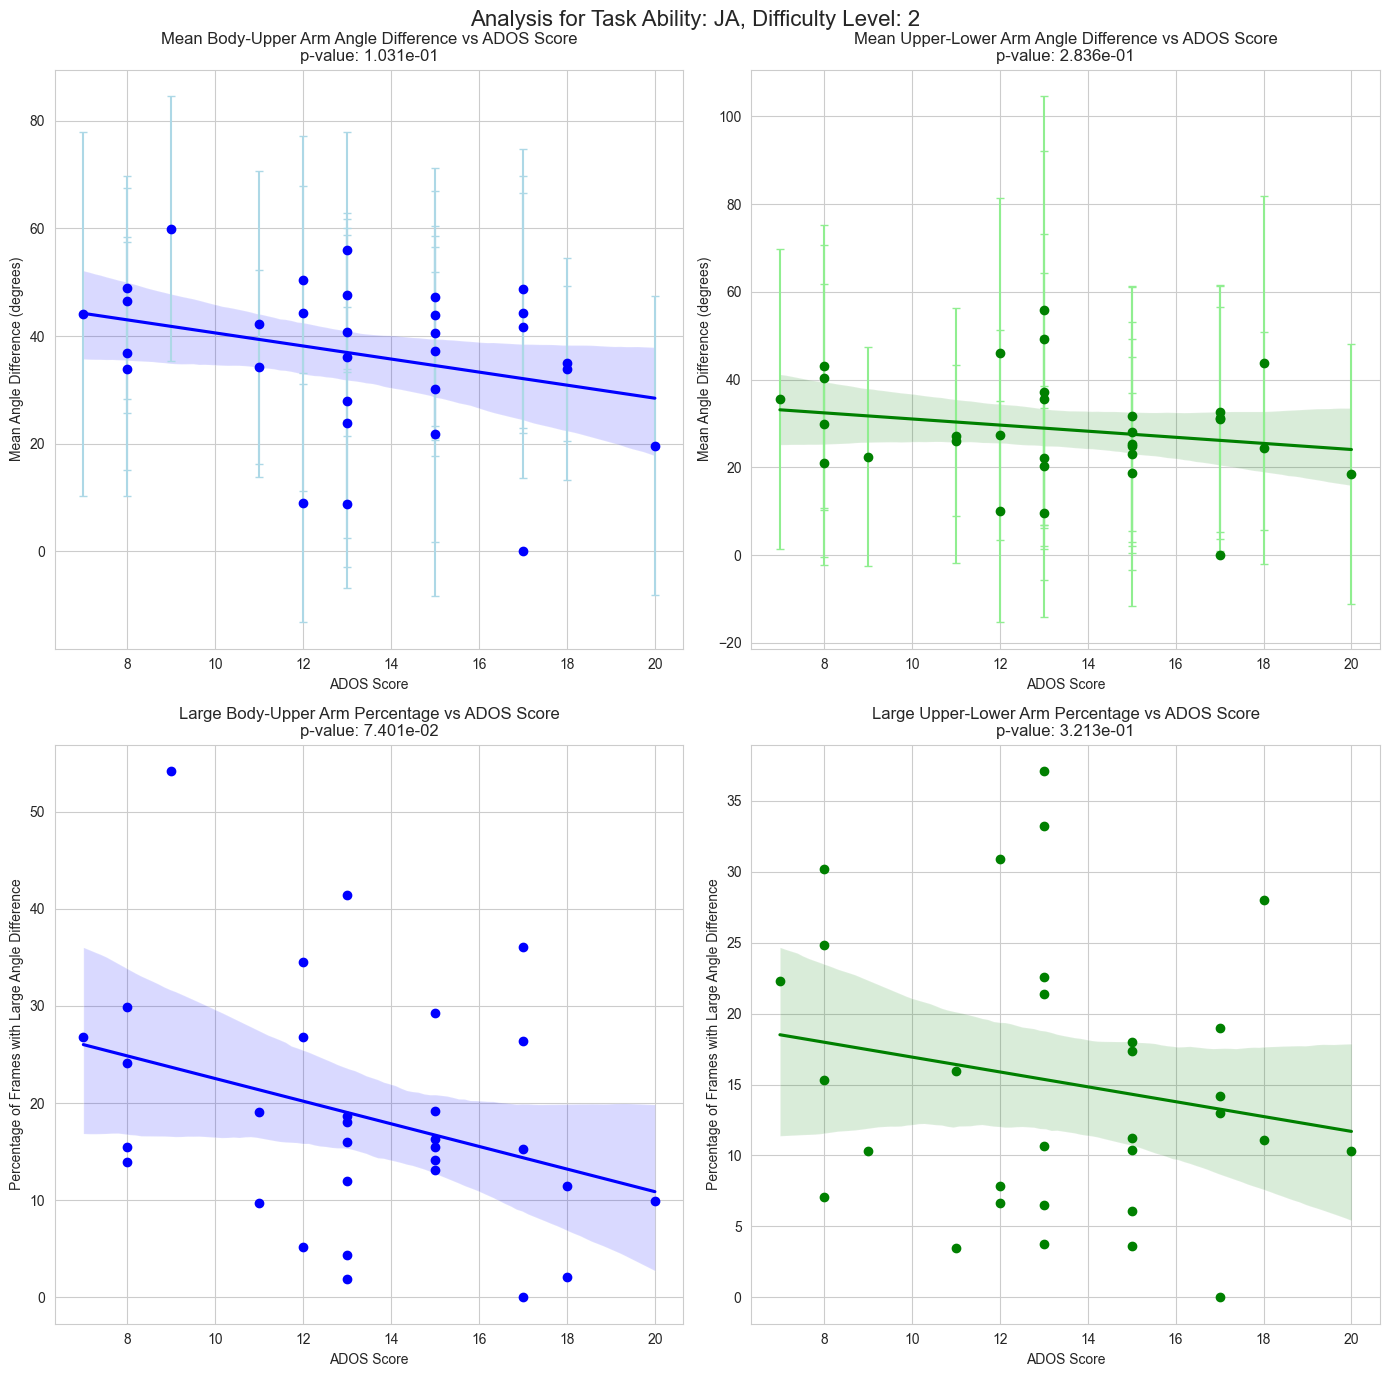

/Users/liyang/Documents/NEU/Capstone/dream-analysis/venv/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/liyang/Documents/NEU/Capstone/dream-analysis/venv/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/liyang/Documents/NEU/Capstone/dream-analysis/venv/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


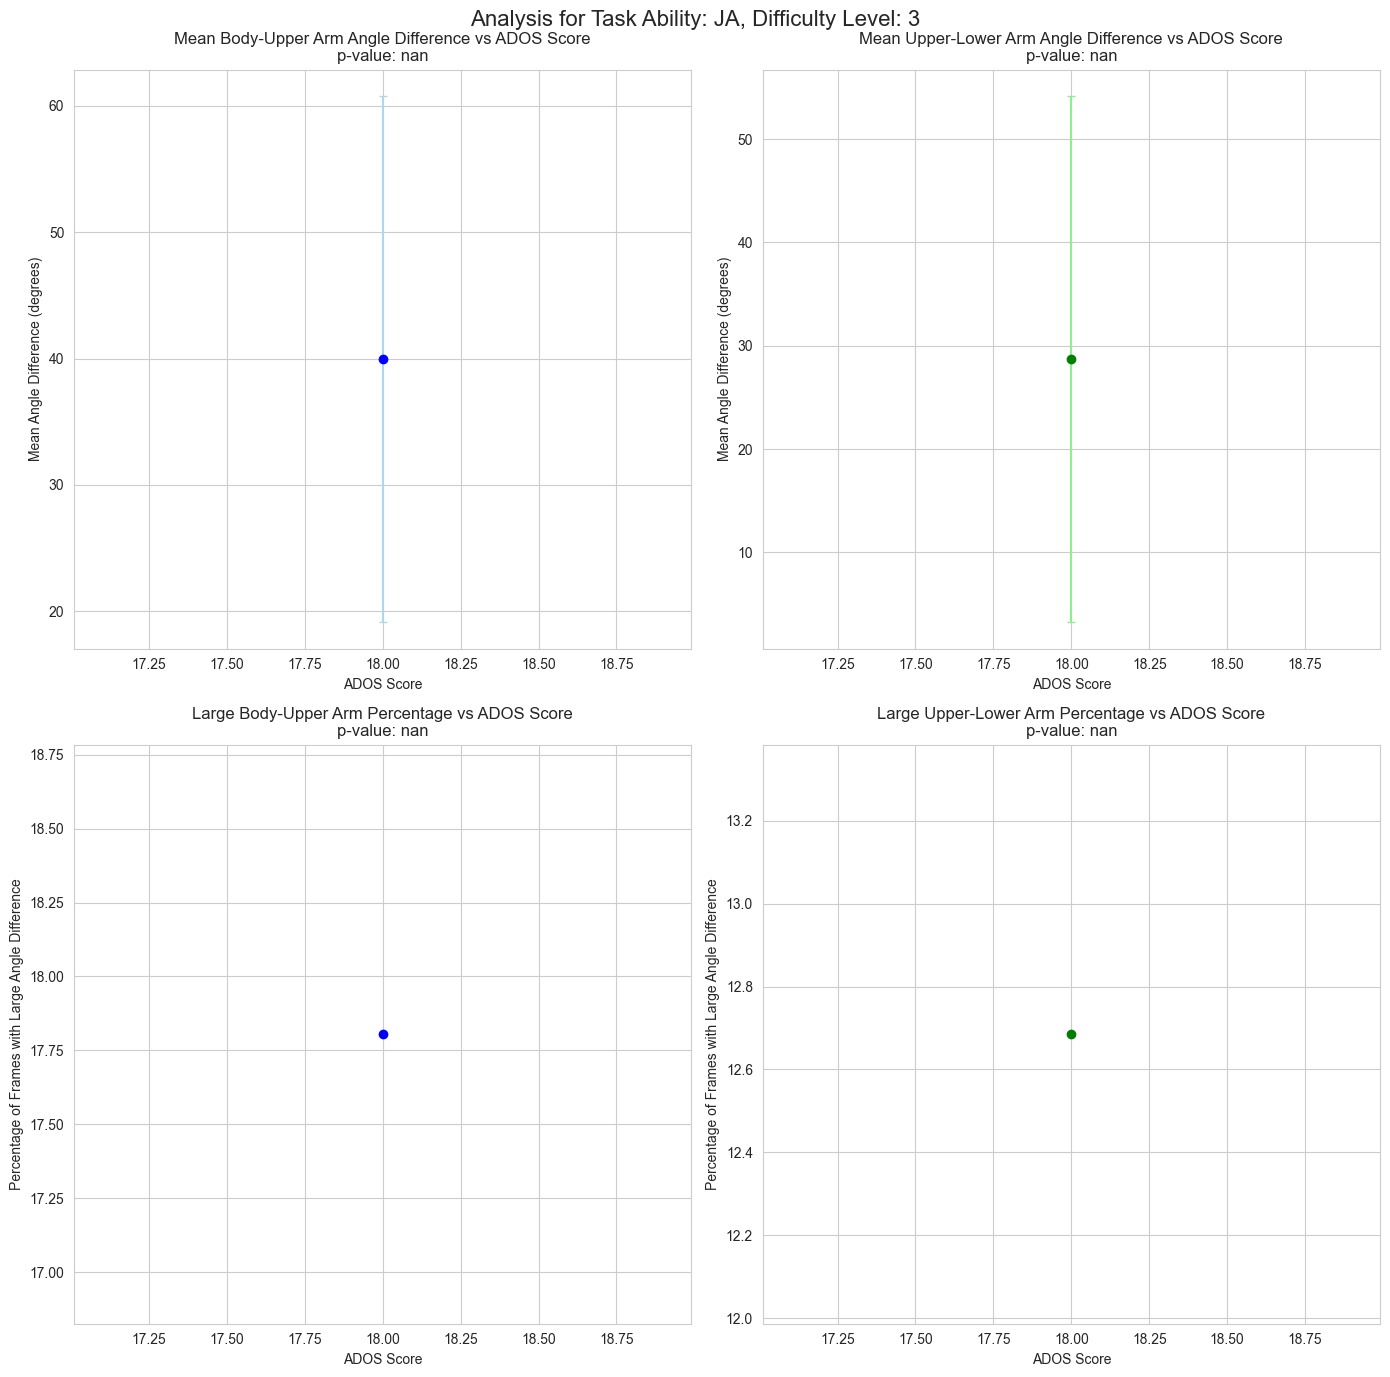

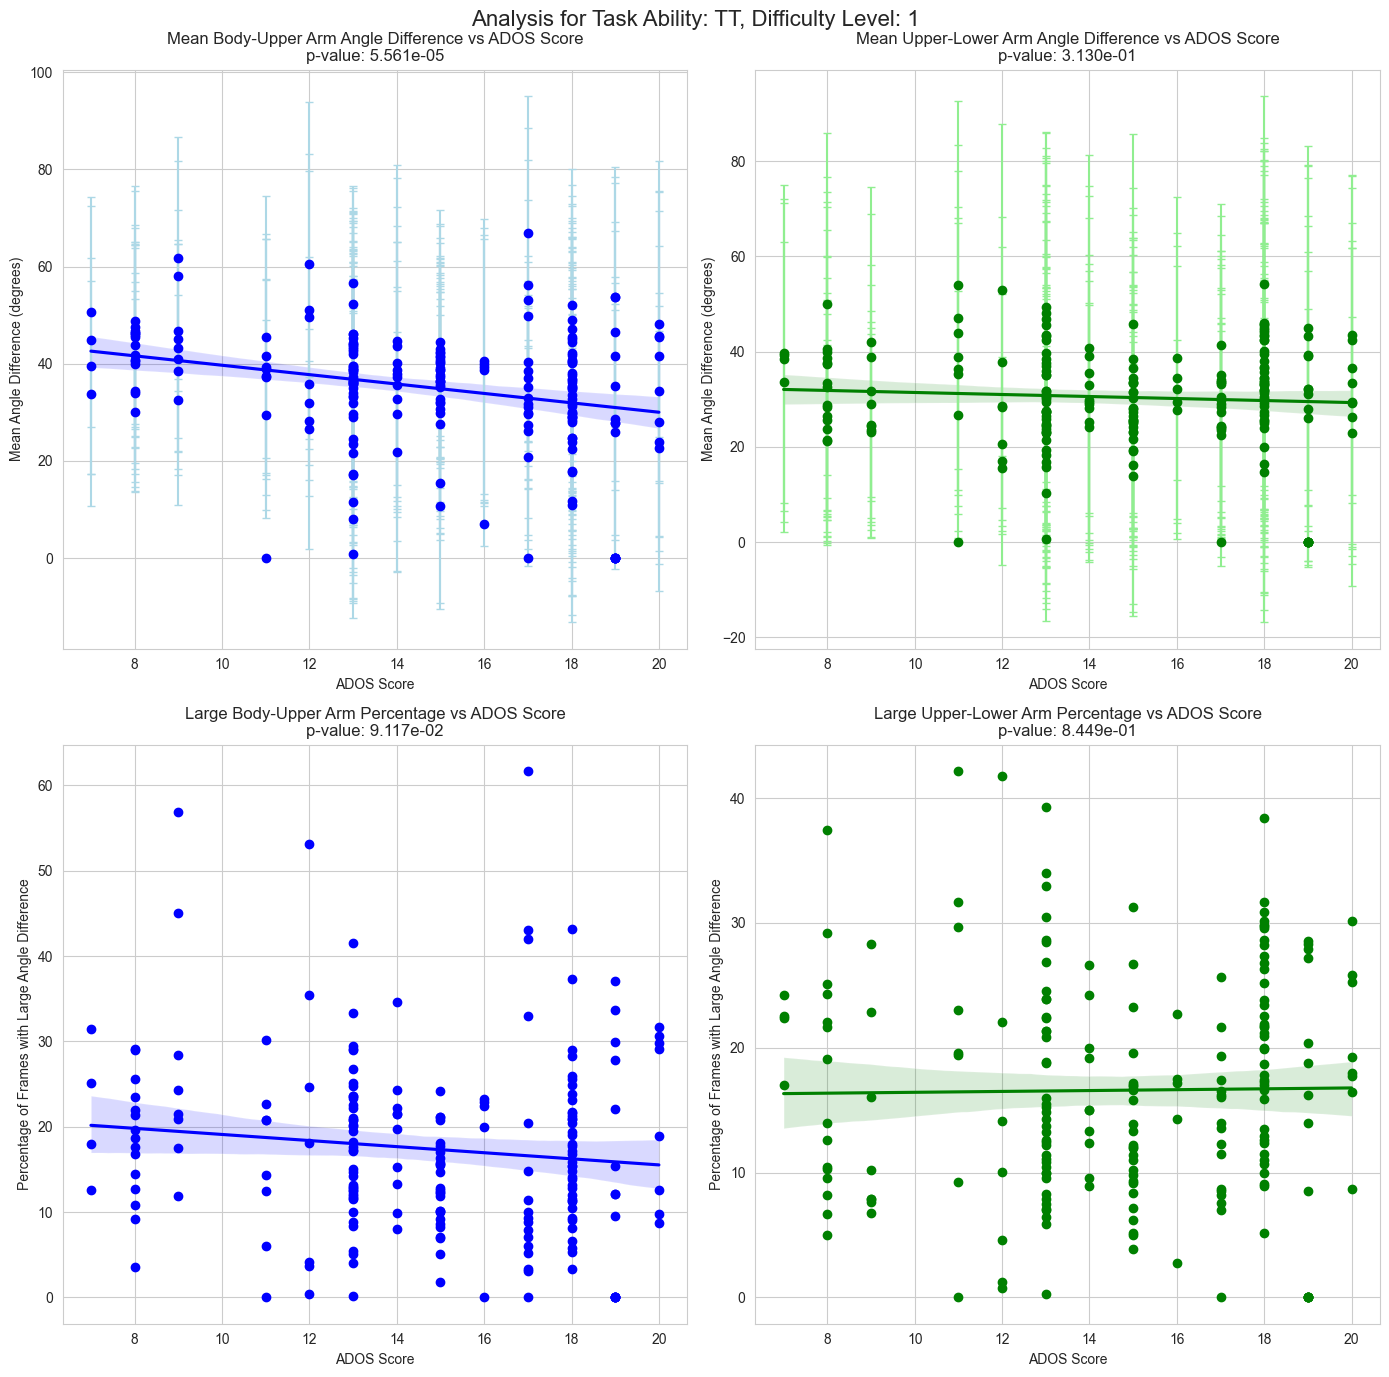

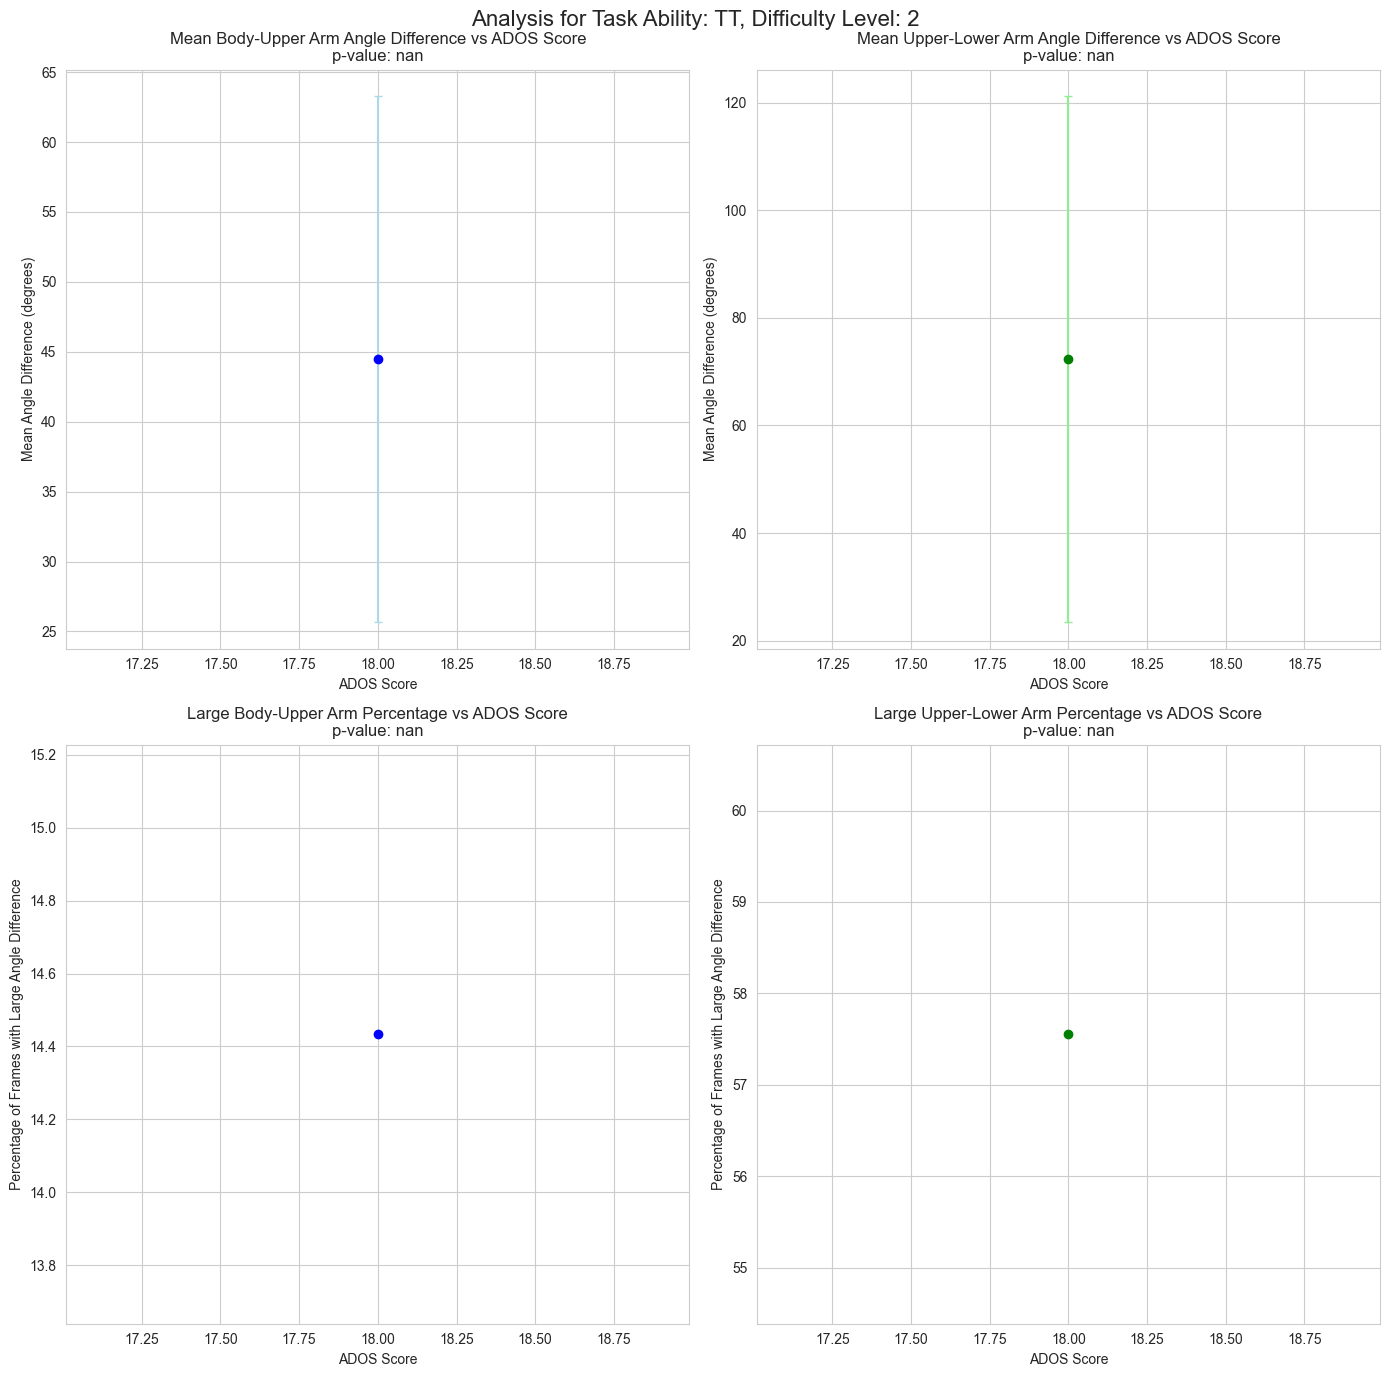

In [17]:
grouped_df_2 = df_2.groupby(['task_ability', 'task_difficultyLevel'])

# Create plots for each group
for (ability, difficulty), group in grouped_df_2:
    plt.figure(figsize=(14, 14))
    plt.suptitle(f"Analysis for Task Ability: {ability}, Difficulty Level: {difficulty}", fontsize=16)
    utils.plot_symmetry_vs_ados(group, plt)